### Final Project: GOT Social Network Analysis
Author: Elizabeth Combs (eac721) | Date Updated: 08/09/2020

This file will produce output for the final project for 2505 Social Network Analysis with R. 

It aims to complete the following steps using the animals dataset:

- Part 0: Data Retrieval
- Part 1: An overview of the dataset
- Part 2: Important Nodes
- Part 3: Visualizations
- Part 4: Community Detection <br>
- GitHub Repo: www.github.com/lcombs/got_socialnetwork

Note: This file is supplemented by report which includes interpretations of results.

In [1]:
# Part 0: Data Retrieval

library(repr)
options(repr.plot.width=16, repr.plot.height=12)

library(igraph)
library(anocva)
set.seed(2020)

#getwd()

# read the marvel data
nodes <- read.csv("got-nodes.csv", header=T, as.is=T)
edges <- read.csv("got-edges.csv", header=T, as.is=T)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



**Data Source**: https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/game-of-thrones

**Key Info**: The nodes csv contains 107 different characters, and the edges csv contains 353 weighted relationships between those characters, which were calculated based on how many times two characters' names appeared within 15 words of one another in the novel. Weights are provided based on the number of connections, but the network is undirected.

**Added Info**: Additional columns were added to the original node dataset. These columns were added based on the author's knowledge of the material. They are not ground truth, but are meant to make the analysis more dynamic.
- (1) gender 
- (2) family name 
- (3) geography 
- (4) politics 
- (5) noteable relationship

In [2]:
# Part 1: Data Overview

# examine the data:
head(nodes)
head(edges)

Id      Label   gender family.name geography     politics  
1 Aemon   Aemon   m      targaryen   wall          nightwatch
2 Grenn   Grenn   m                  wall          nightwatch
3 Samwell Samwell m      tarly       wall          nightwatch
4 Aerys   Aerys   m      targaryen   kings_landing targaryen 
5 Jaime   Jaime   m      lannister   kings_landing lannister 
6 Robert  Robert  m      baratheon   kings_landing baratheon 
  notable.relation.to.principal
1 jon_snow                     
2 jon_snow                     
3 jon_snow                     
4                              
5 cersei_lannister             
6 joffrey_baratheon

Source Target  Weight
1 Aemon  Grenn    5    
2 Aemon  Samwell 31    
3 Aerys  Jaime   18    
4 Aerys  Robert   6    
5 Aerys  Tyrion   5    
6 Aerys  Tywin    8

In [3]:
# convert to net
net <- graph_from_data_frame(d=edges, vertices=nodes, directed=F) 

# explore the data
E(net) # edges
V(net) # nodes
# specific variables in each
V(net) %>% names()
E(net)$Weight # weights of relationship
V(net)$gender # gender of each character
V(net)[family.name=="targaryen"] # characters with last name taragaryen

+ 352/352 edges from d4045ef (vertex names):
 [1] Aemon  --Grenn     Aemon  --Samwell   Aerys  --Jaime     Aerys  --Robert   
 [5] Aerys  --Tyrion    Aerys  --Tywin     Alliser--Mance     Amory  --Oberyn   
 [9] Arya   --Anguy     Arya   --Beric     Arya   --Bran      Arya   --Brynden  
[13] Arya   --Cersei    Arya   --Gendry    Arya   --Gregor    Jaime  --Arya     
[17] Arya   --Joffrey   Arya   --Jon       Arya   --Rickon    Robert --Arya     
[21] Arya   --Roose     Arya   --Sandor    Arya   --Thoros    Tyrion --Arya     
[25] Balon  --Loras     Belwas --Barristan Belwas --Illyrio   Anguy  --Beric    
[29] Beric  --Gendry    Beric  --Thoros    Bran   --Hodor     Bran   --Jojen    
[33] Bran   --Jon       Bran   --Luwin     Bran   --Meera     Bran   --Nan      
[37] Bran   --Rickon    Samwell--Bran      Bran   --Theon     Loras  --Brienne  
+ ... omitted several edges

+ 107/107 vertices, named, from d4045ef:
  [1] Aemon        Grenn        Samwell      Aerys        Jaime       
  [6] Robert       Tyrion       Tywin        Alliser      Mance       
 [11] Amory        Oberyn       Arya         Anguy        Beric       
 [16] Bran         Brynden      Cersei       Gendry       Gregor      
 [21] Joffrey      Jon          Rickon       Roose        Sandor      
 [26] Thoros       Balon        Loras        Belwas       Barristan   
 [31] Illyrio      Hodor        Jojen        Luwin        Meera       
 [36] Nan          Theon        Brienne      Bronn        Podrick     
 [41] Lothar       Walder       Catelyn      Edmure       Hoster      
 [46] Jeyne        Lysa         Petyr        Robb         Roslin      
+ ... omitted several vertices

[1] "Aemon"        "Grenn"        "Samwell"      "Aerys"        "Jaime"       
  [6] "Robert"       "Tyrion"       "Tywin"        "Alliser"      "Mance"       
 [11] "Amory"        "Oberyn"       "Arya"         "Anguy"        "Beric"       
 [16] "Bran"         "Brynden"      "Cersei"       "Gendry"       "Gregor"      
 [21] "Joffrey"      "Jon"          "Rickon"       "Roose"        "Sandor"      
 [26] "Thoros"       "Balon"        "Loras"        "Belwas"       "Barristan"   
 [31] "Illyrio"      "Hodor"        "Jojen"        "Luwin"        "Meera"       
 [36] "Nan"          "Theon"        "Brienne"      "Bronn"        "Podrick"     
 [41] "Lothar"       "Walder"       "Catelyn"      "Edmure"       "Hoster"      
 [46] "Jeyne"        "Lysa"         "Petyr"        "Robb"         "Roslin"      
 [51] "Sansa"        "Stannis"      "Elia"         "Ilyn"         "Meryn"       
 [56] "Pycelle"      "Shae"         "Varys"        "Craster"      "Karl"        
 [61] "Daario"       "Drogo"        "Irri"         "Daenerys"     "Aegon"       
 [66] "Jorah"        "Kraznys"      "Missandei"    "Rakharo"      "Rhaegar"     
 [71] "Viserys"      "Worm"         "Davos"        "Cressen"      "Salladhor"   
 [76] "Eddard"       "Eddison"      "Gilly"        "Qyburn"       "Renly"       
 [81] "Tommen"       "Janos"        "Bowen"        "Kevan"        "Margaery"    
 [86] "Myrcella"     "Dalla"        "Melisandre"   "Orell"        "Qhorin"      
 [91] "Rattleshirt"  "Styr"         "Val"          "Ygritte"      "Jon Arryn"   
 [96] "Lancel"       "Olenna"       "Marillion"    "Robert Arryn" "Ellaria"     
[101] "Mace"         "Rickard"      "Ramsay"       "Chataya"      "Shireen"     
[106] "Doran"        "Walton"

[1]  5 31 18  6  5  8  5  5 11 23  9  6  5 43  7 11  6  7  8  4  5 46 18  5  4
 [26] 18 10  4  4 21 96 46 12  4 54 14 35 11 11  7  5 19  4  5  4  7  8  4 16  9
 [51] 19 10  8  5 43  4  6  8  4  5 19  5  4  4  6  7 36 23 10  4 16  6  4 46  4
 [76]  6  4  5  8 20 26 14 18 17 47 10 26  7 12  5  8 14  4 16 18  8 15  5  6  6
[101]  8  8 13 10  5  6  8  7  4 16  9  7 17  9  7  7 24 12 35 41  9  7  6  4 88
[126]  5  4  6 15 16 11 11  7 17  5  8 31  9  5  4  5  4  8  7 28  5  5  4 14 10
[151]  9 54 33 11 30 15  7  6  4  9 25  8 69  4  7  6 31 20  5 52  9 16  8 12 54
[176]  5  6 11 13  7  6  7  5  9  5  4  4  4  6 10 29  9  5  4 11  8  7 10  9  7
[201]  8 12  7 30  5  5  4  5  4  6  6  4  6  8  7  4  5  7  5  6  4  8 15  6 23
[226]  6 17 32  5 15 18 10 14 10  5  4  7 15  4 15  4 11 12 12 26  4  5  4  5  4
[251]  4  4  6 34 12 36 43  6 10  5 15  5  4  4  6 10 22 10  5 16 10 35  4  5 14
[276] 28 36  9  4  7 28  8  4  7  5  6  6  8 77  4  8  5  4  4 32 20 15 13  5  4
[301] 31  5  5  5  4 22  5  5 11  6  9  7  5 25 12 28 11  6  9  4 21  6 18  5  4
[326] 16  7 13 13 14  5  6  4  5  5 11 15  4 39  4  6  4  7  4  7  4 12  6  6 10
[351]  7  9

[1] "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "f" "m" "m" "m" "m" "f"
 [19] "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "m" "f" "f"
 [37] "m" "f" "m" "m" "m" "m" "f" "m" "m" "f" "f" "m" "m" "f" "f" "m" "f" "m"
 [55] "m" "m" "f" "m" "m" "m" "m" "m" "f" "f" "m" "m" "m" "f" "m" "m" "m" "m"
 [73] "m" "m" "m" "m" "m" "f" "m" "m" "m" "m" "m" "m" "f" "f" "f" "f" "m" "m"
 [91] "m" "m" "f" "f" "m" "m" "f" "m" "m" "f" "m" "m" "m" "f" "f" "m" "m"

+ 6/107 vertices, named, from d4045ef:
[1] Aemon    Aerys    Daenerys Aegon    Rhaegar  Viserys 

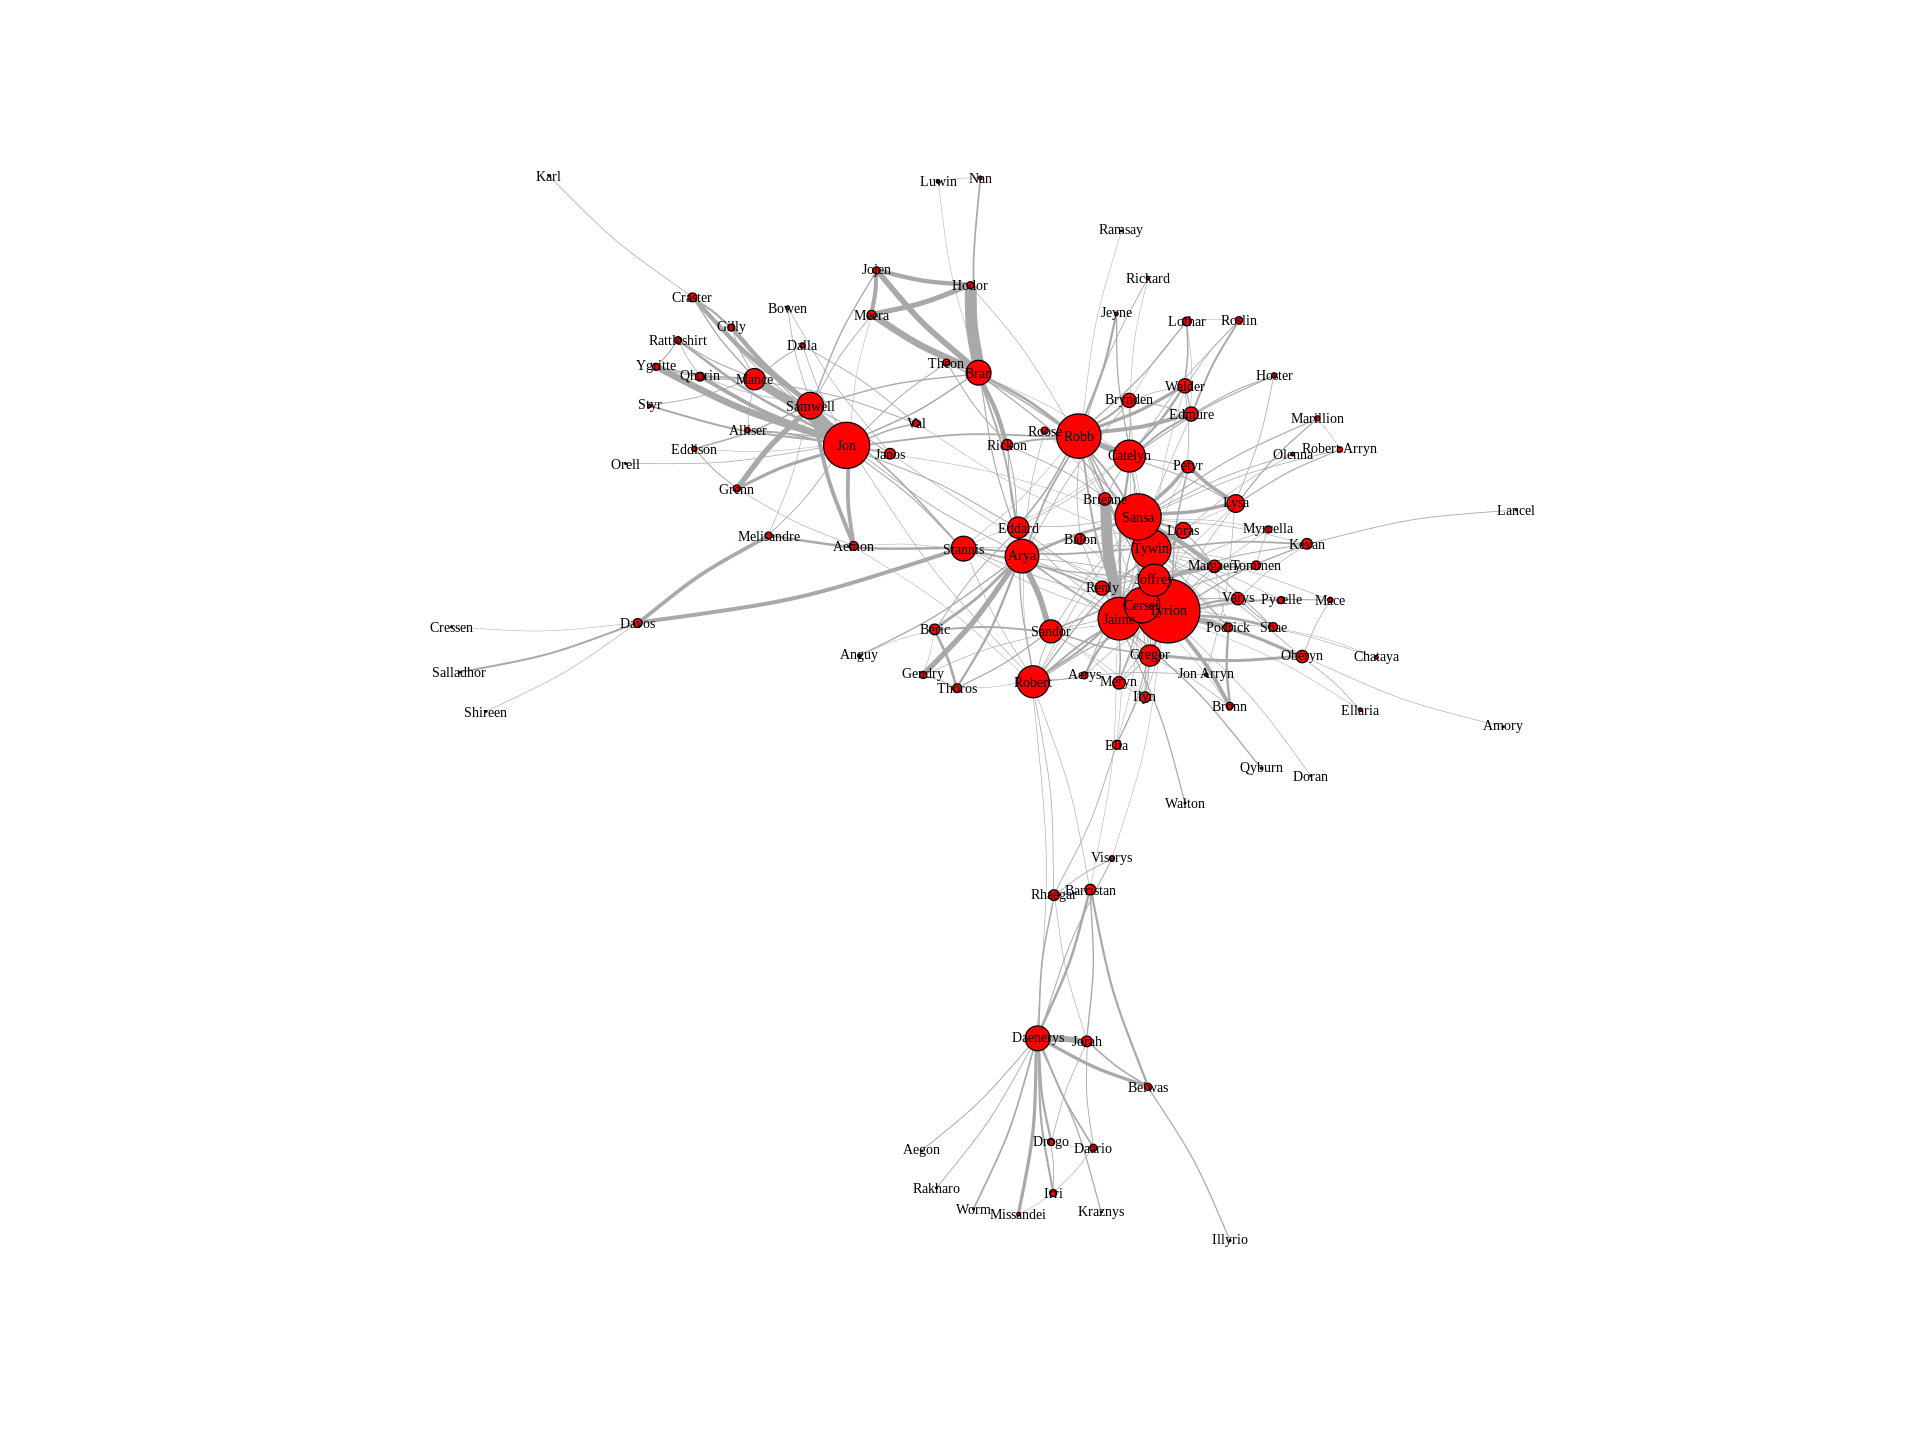

In [4]:
# first plot
#plot(net)

# simplify the net 
net <- simplify(net, remove.multiple = F, remove.loops = T) 

# second, cleaner plot
# par(mfrow=c(1,1))
# plot(net, edge.arrow.size=.1, edge.curved=0.1,
#      vertex.color="tomato", vertex.frame.color="white",
#      vertex.label=names(V(net)), vertex.label.color="black",
#      vertex.label.cex=.5) 


# compute size of nodes based on number of degrees
deg <- degree(net, mode="all", normalized = F)
V(net)$size <- deg/3
E(net)$width <- E(net)$Weight/10

# with width edges, size vertex (Figure 1)
par(mfrow=c(1,1))
set.seed(2020)
plot(net, edge.arrow.size=.1, edge.curved=0.1,
     vertex.color="red",
     vertex.label=names(V(net)), vertex.label.color="black",
     vertex.label.cex=.7, edge.width=E(net)$width, 
     size=V(net)$size) 

In [5]:
# weights
# hist(E(net)$Weight)
# mean(E(net)$Weight) 
# sd(E(net)$Weight)

# average degree of the graph:
mean(deg) 

sort(closeness(net, mode="all", weights=NA, normalized=T), decreasing = T)[1:15]
sort(betweenness(net, directed=F, weights=NA, normalized = T), decreasing = T)[1:15]

[1] 6.579439

Tyrion     Sansa    Robert      Robb      Arya     Jaime       Jon   Stannis 
0.5120773 0.5096154 0.5000000 0.4884793 0.4862385 0.4796380 0.4796380 0.4796380 
    Tywin    Eddard    Cersei   Catelyn   Joffrey      Bran    Sandor 
0.4690265 0.4608696 0.4435146 0.4416667 0.4398340 0.4206349 0.4173228

Jon     Robert     Tyrion   Daenerys       Robb      Sansa    Stannis 
0.22996466 0.20945238 0.19791284 0.15720345 0.12696447 0.12672032 0.10269986 
     Jaime       Arya      Tywin       Bran      Davos    Catelyn  Barristan 
0.09994344 0.07960711 0.06553840 0.06301660 0.05606469 0.04890588 0.04011407 
   Samwell 
0.03227263

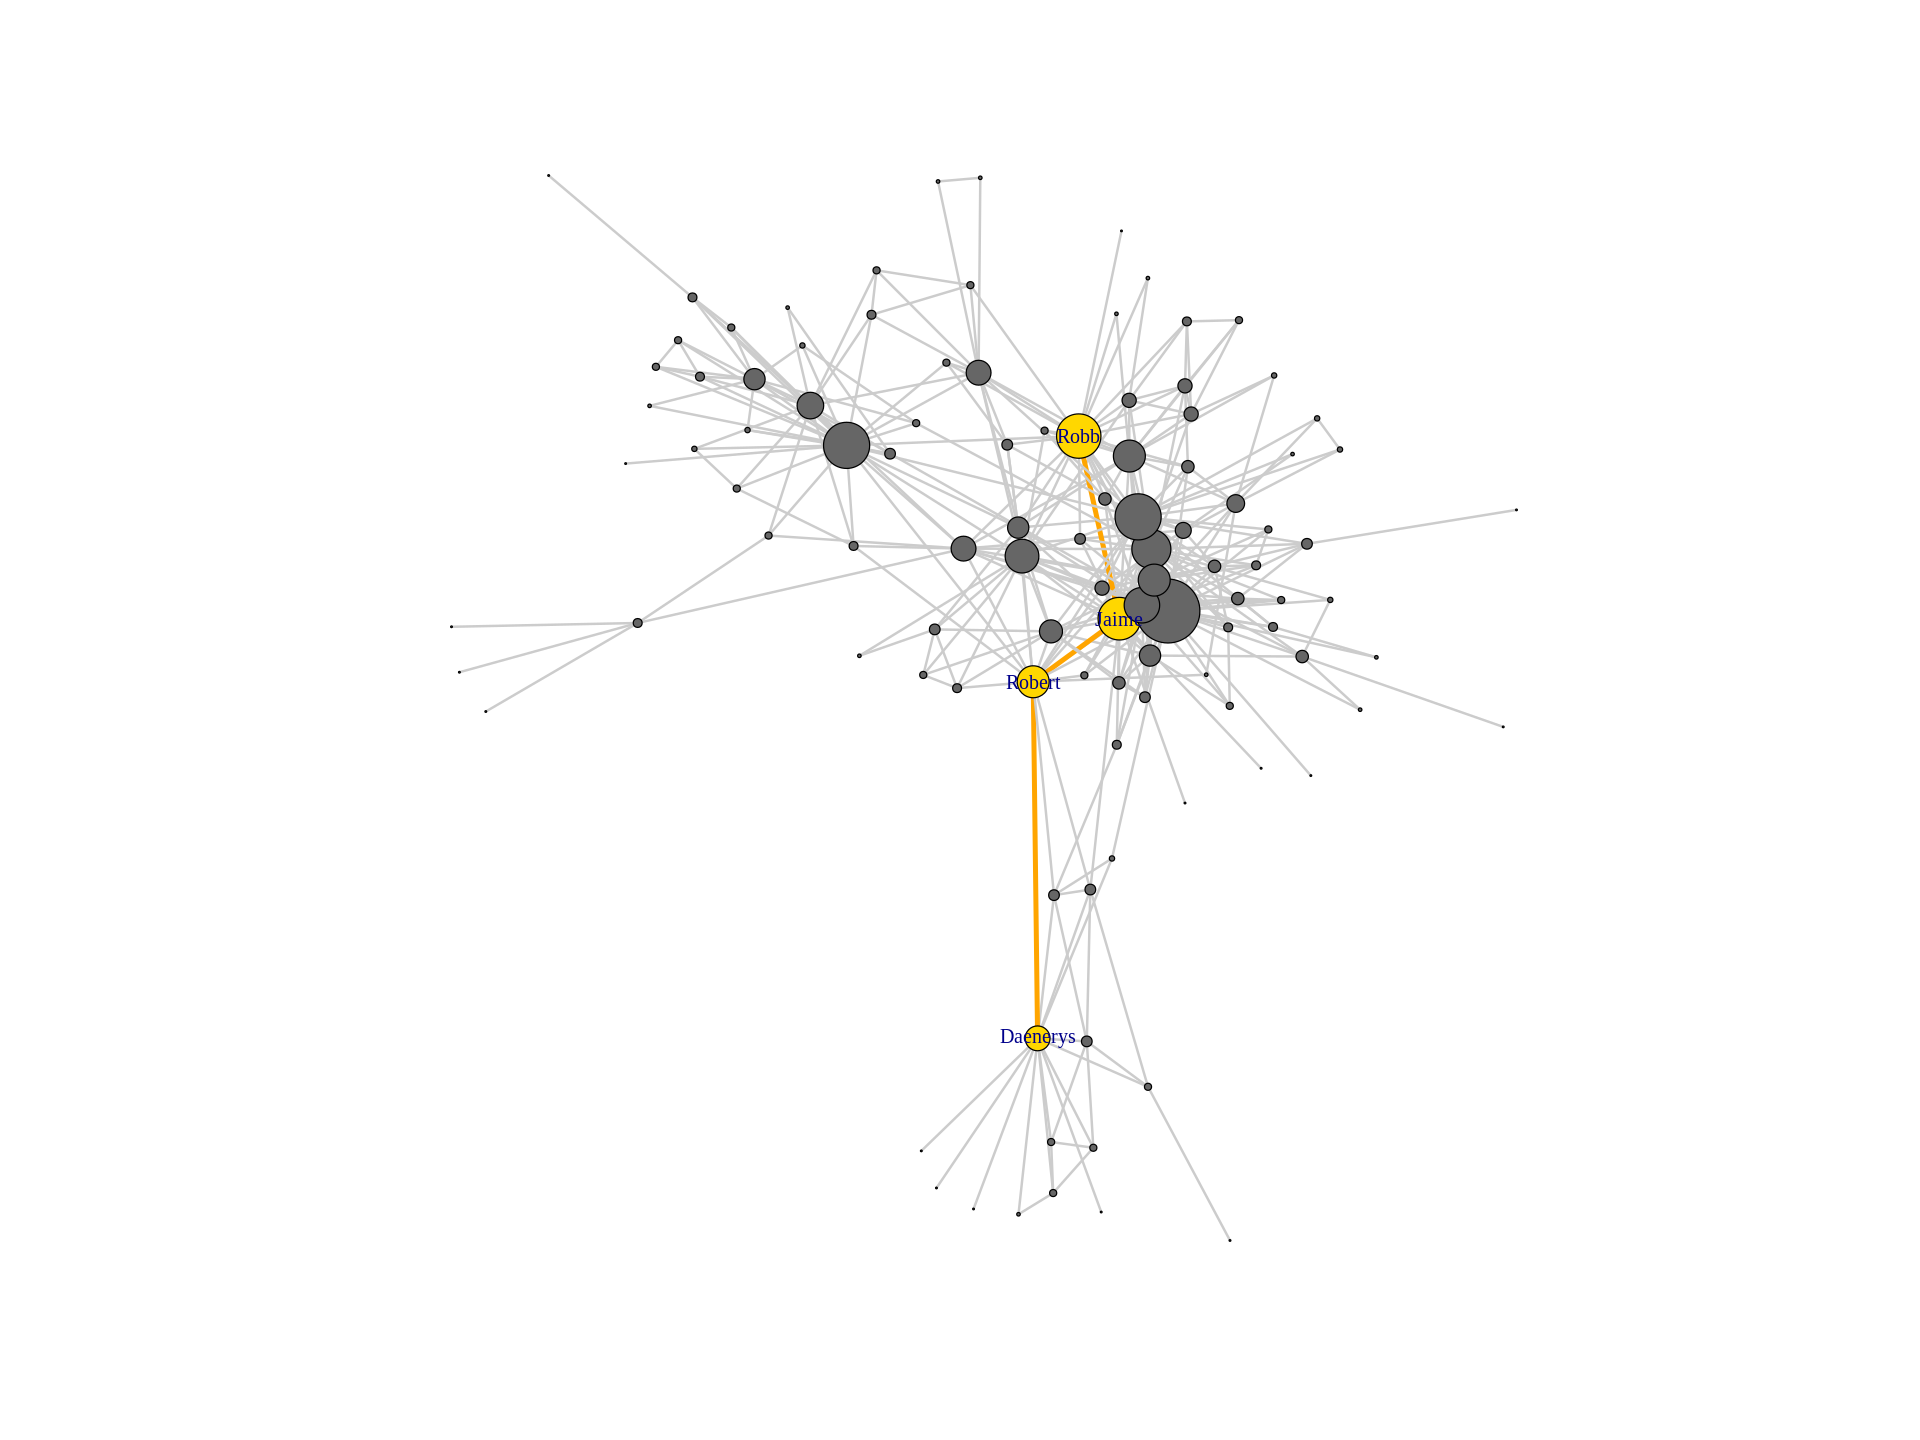

In [6]:
# deep dive on Daenerys
d.path <- shortest_paths(net, 
                            from = V(net)[Label=="Daenerys"], 
                            to  = V(net)[Label=="Robb"],
                            output = "both") # both path nodes and edges

# Generate edge color variable to plot the path:
ecol <- rep("gray80", ecount(net))
ecol[unlist(d.path$epath)] <- "orange"
# Generate edge width variable to plot the path:
ew <- rep(2, ecount(net))
ew[unlist(d.path$epath)] <- 4
# Generate node color variable to plot the path:
vcol <- rep("gray40", vcount(net))
vcol[unlist(d.path$vpath)] <- "gold"

vnames <- rep("", vcount(net))
vnames[unlist(d.path$vpath)] <- names(unlist(d.path$vpath))

set.seed(2020)
plot(net, vertex.color=vcol, edge.color=ecol, 
     edge.width=ew, edge.arrow.mode=0, vertex.label=vnames)

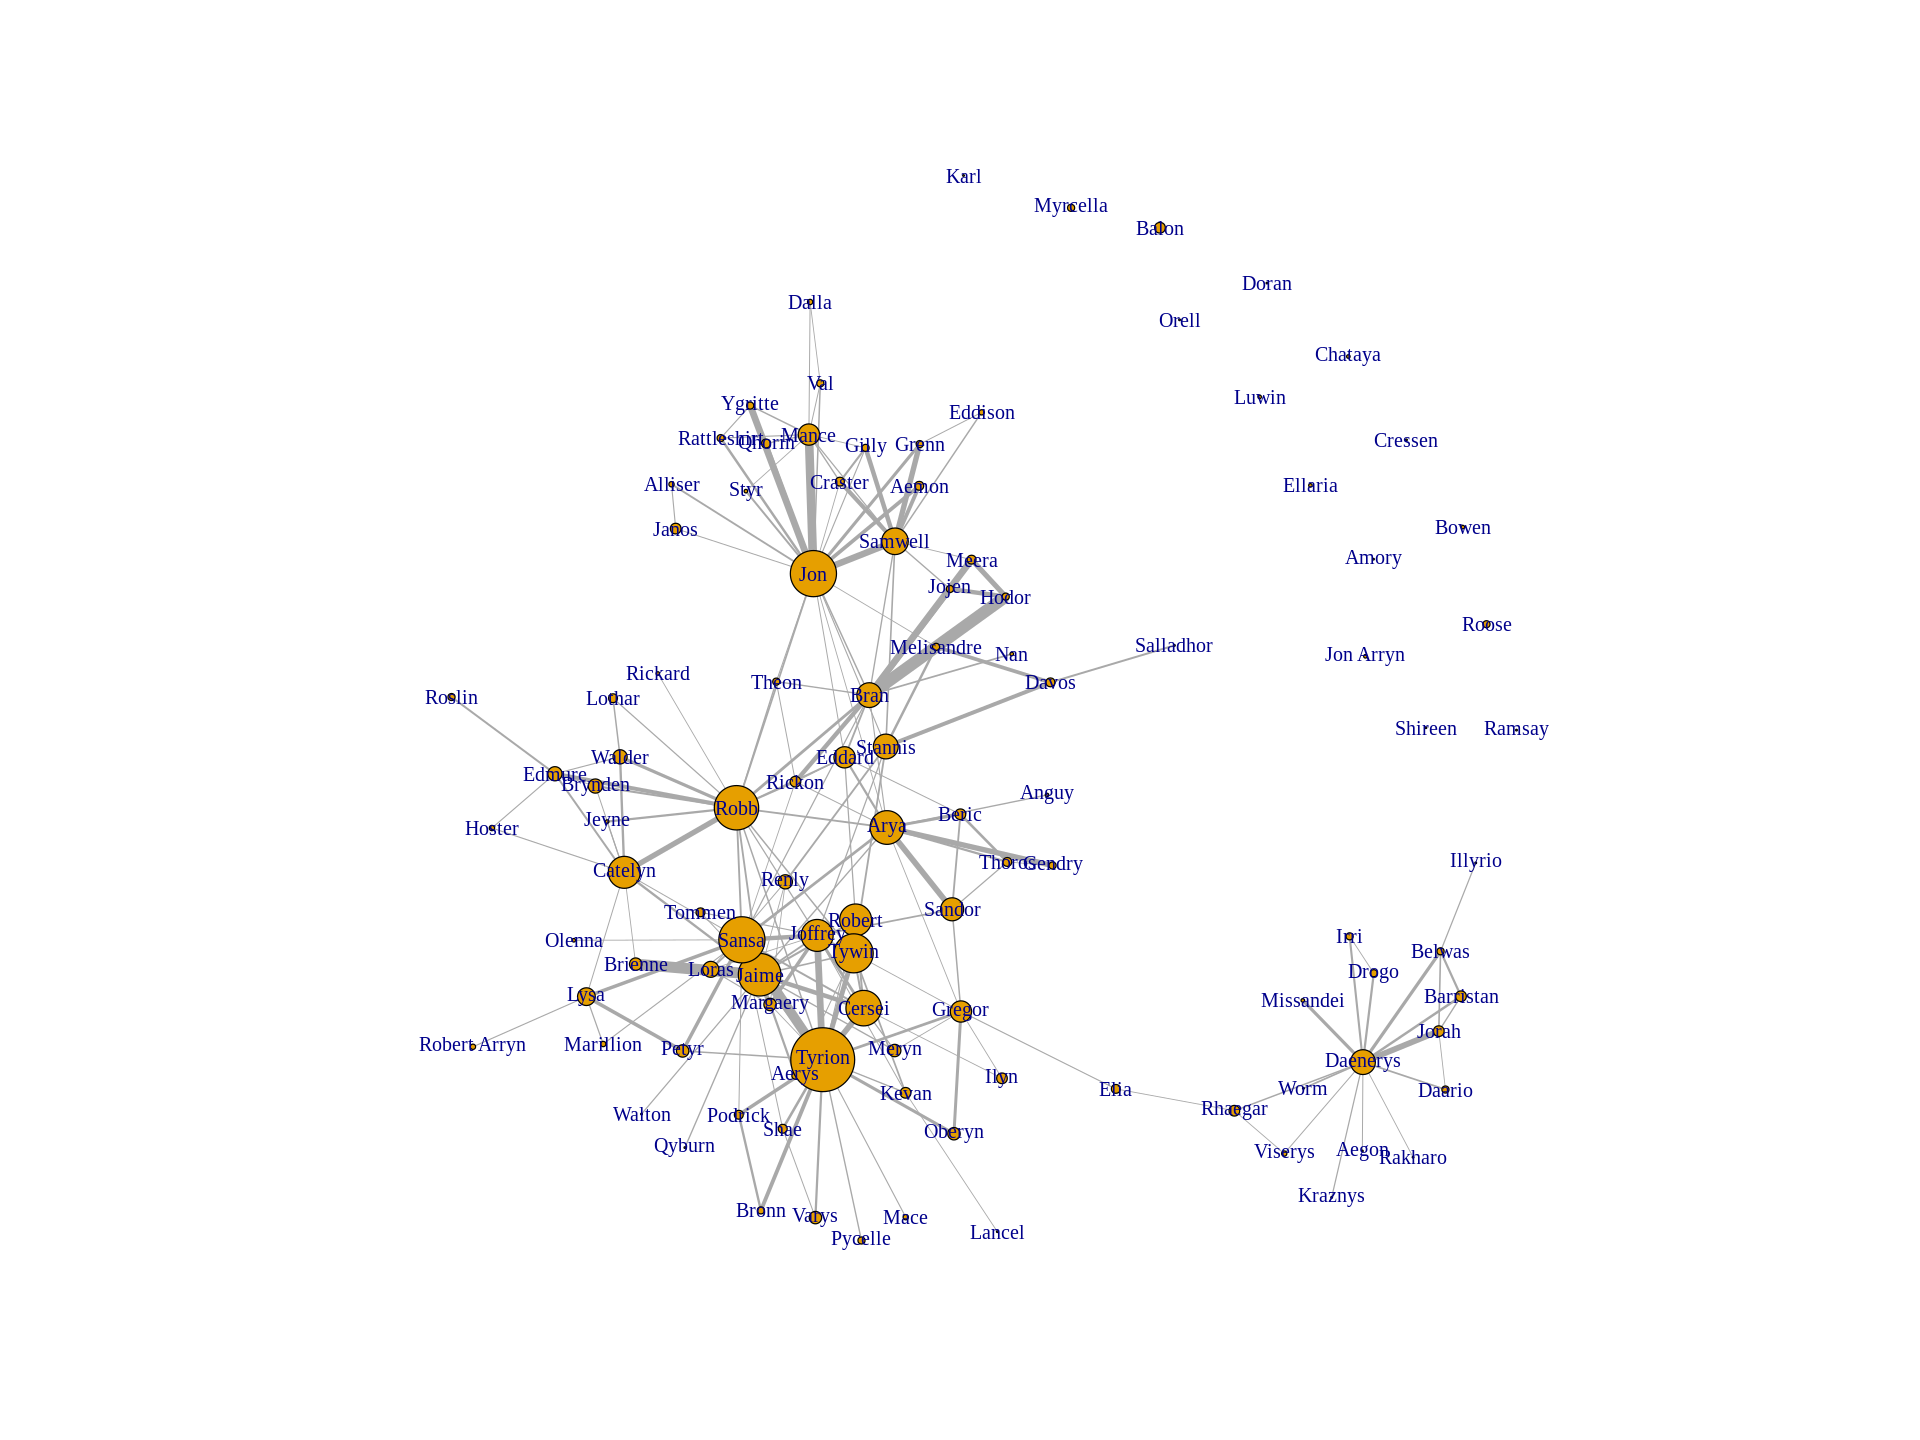

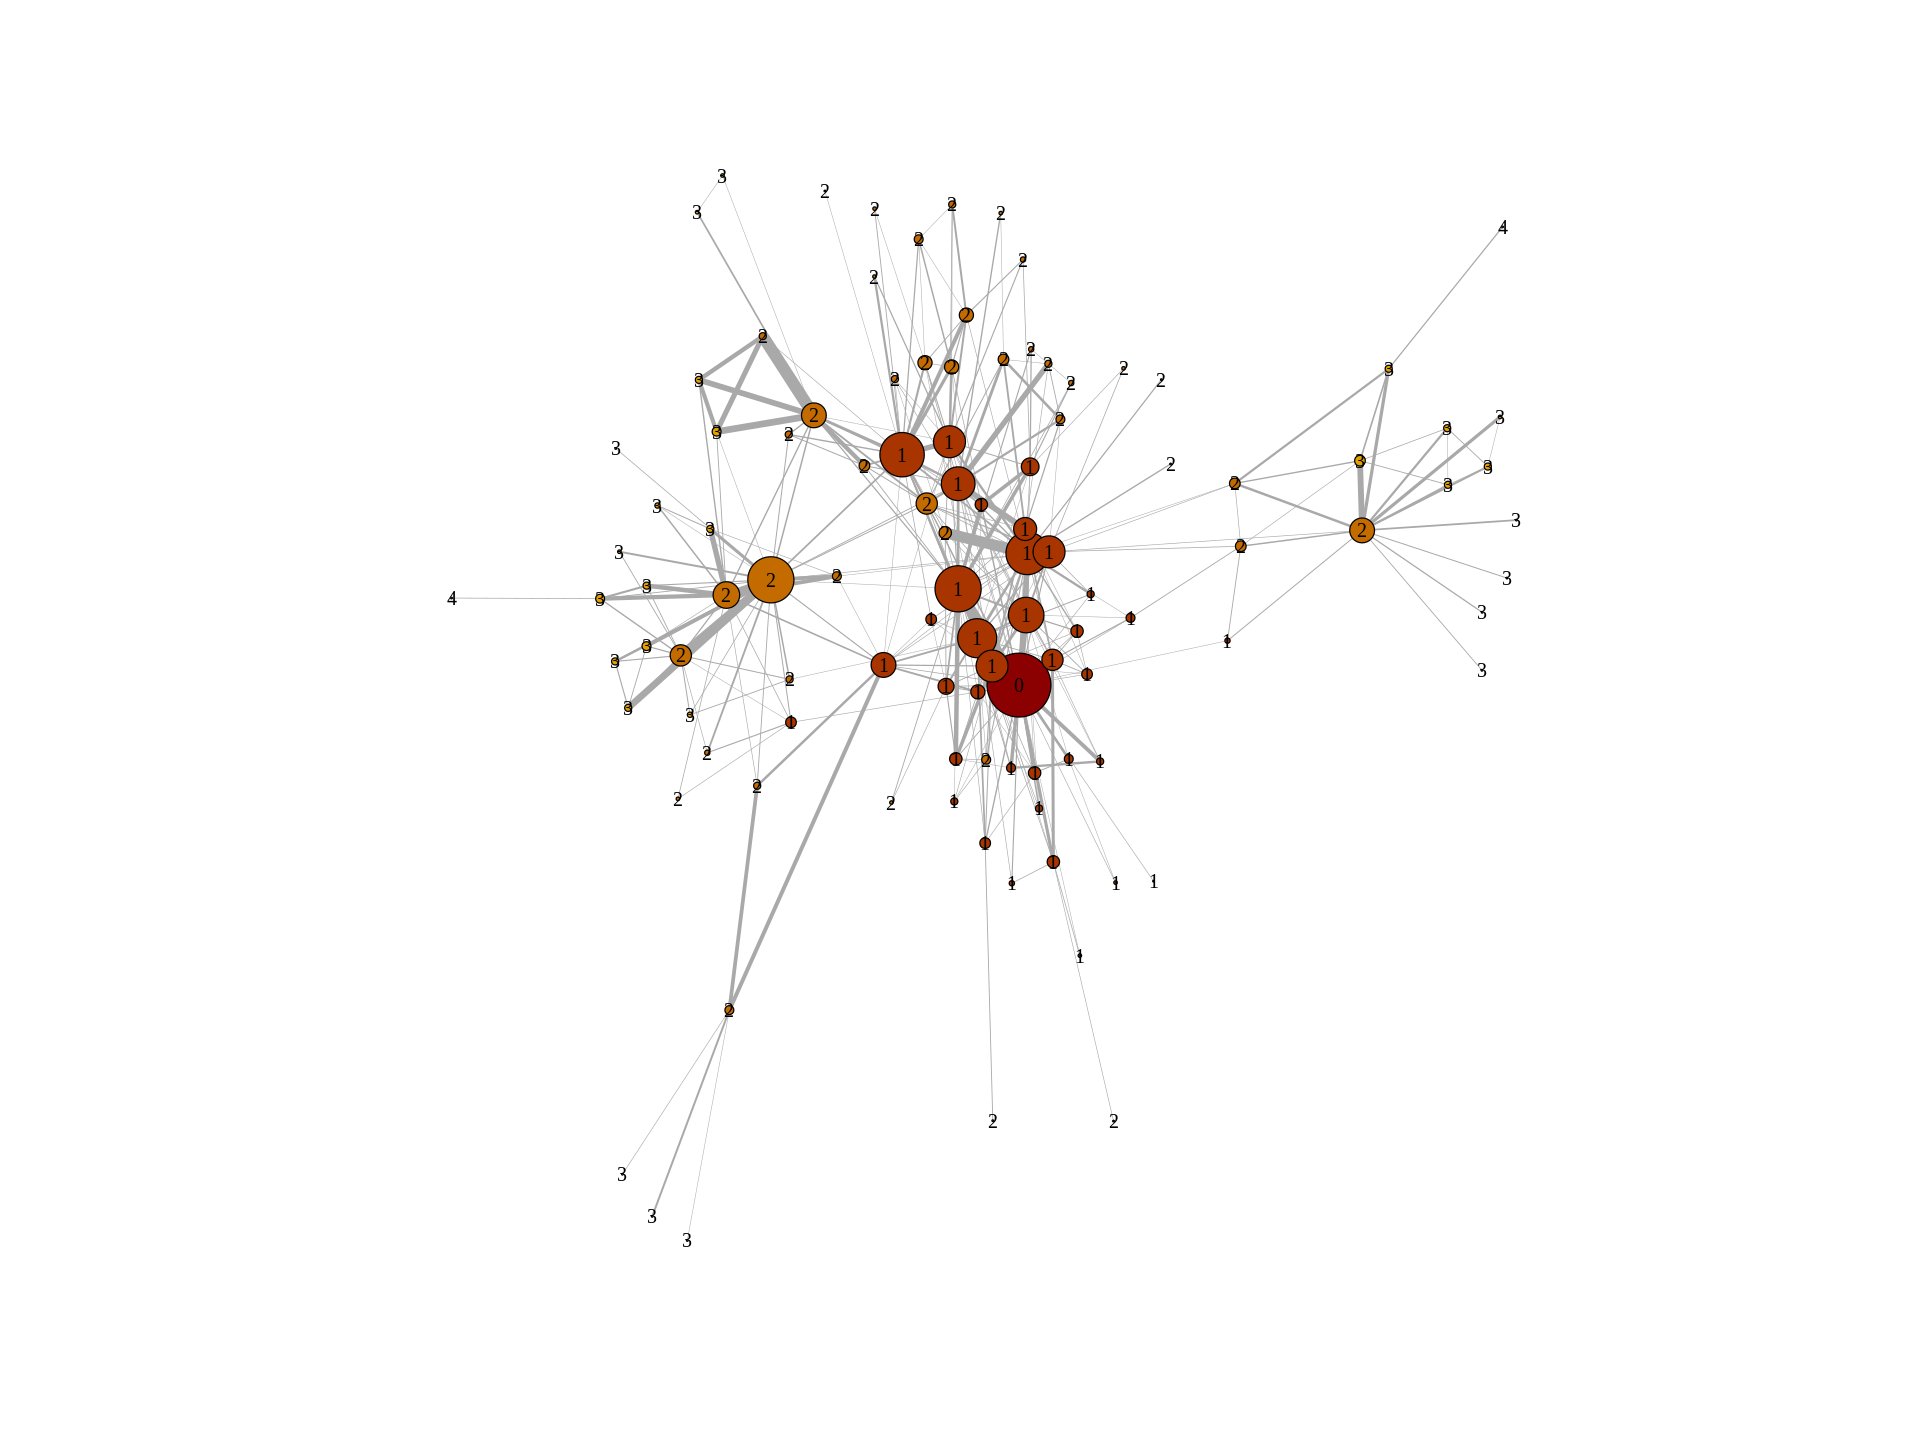

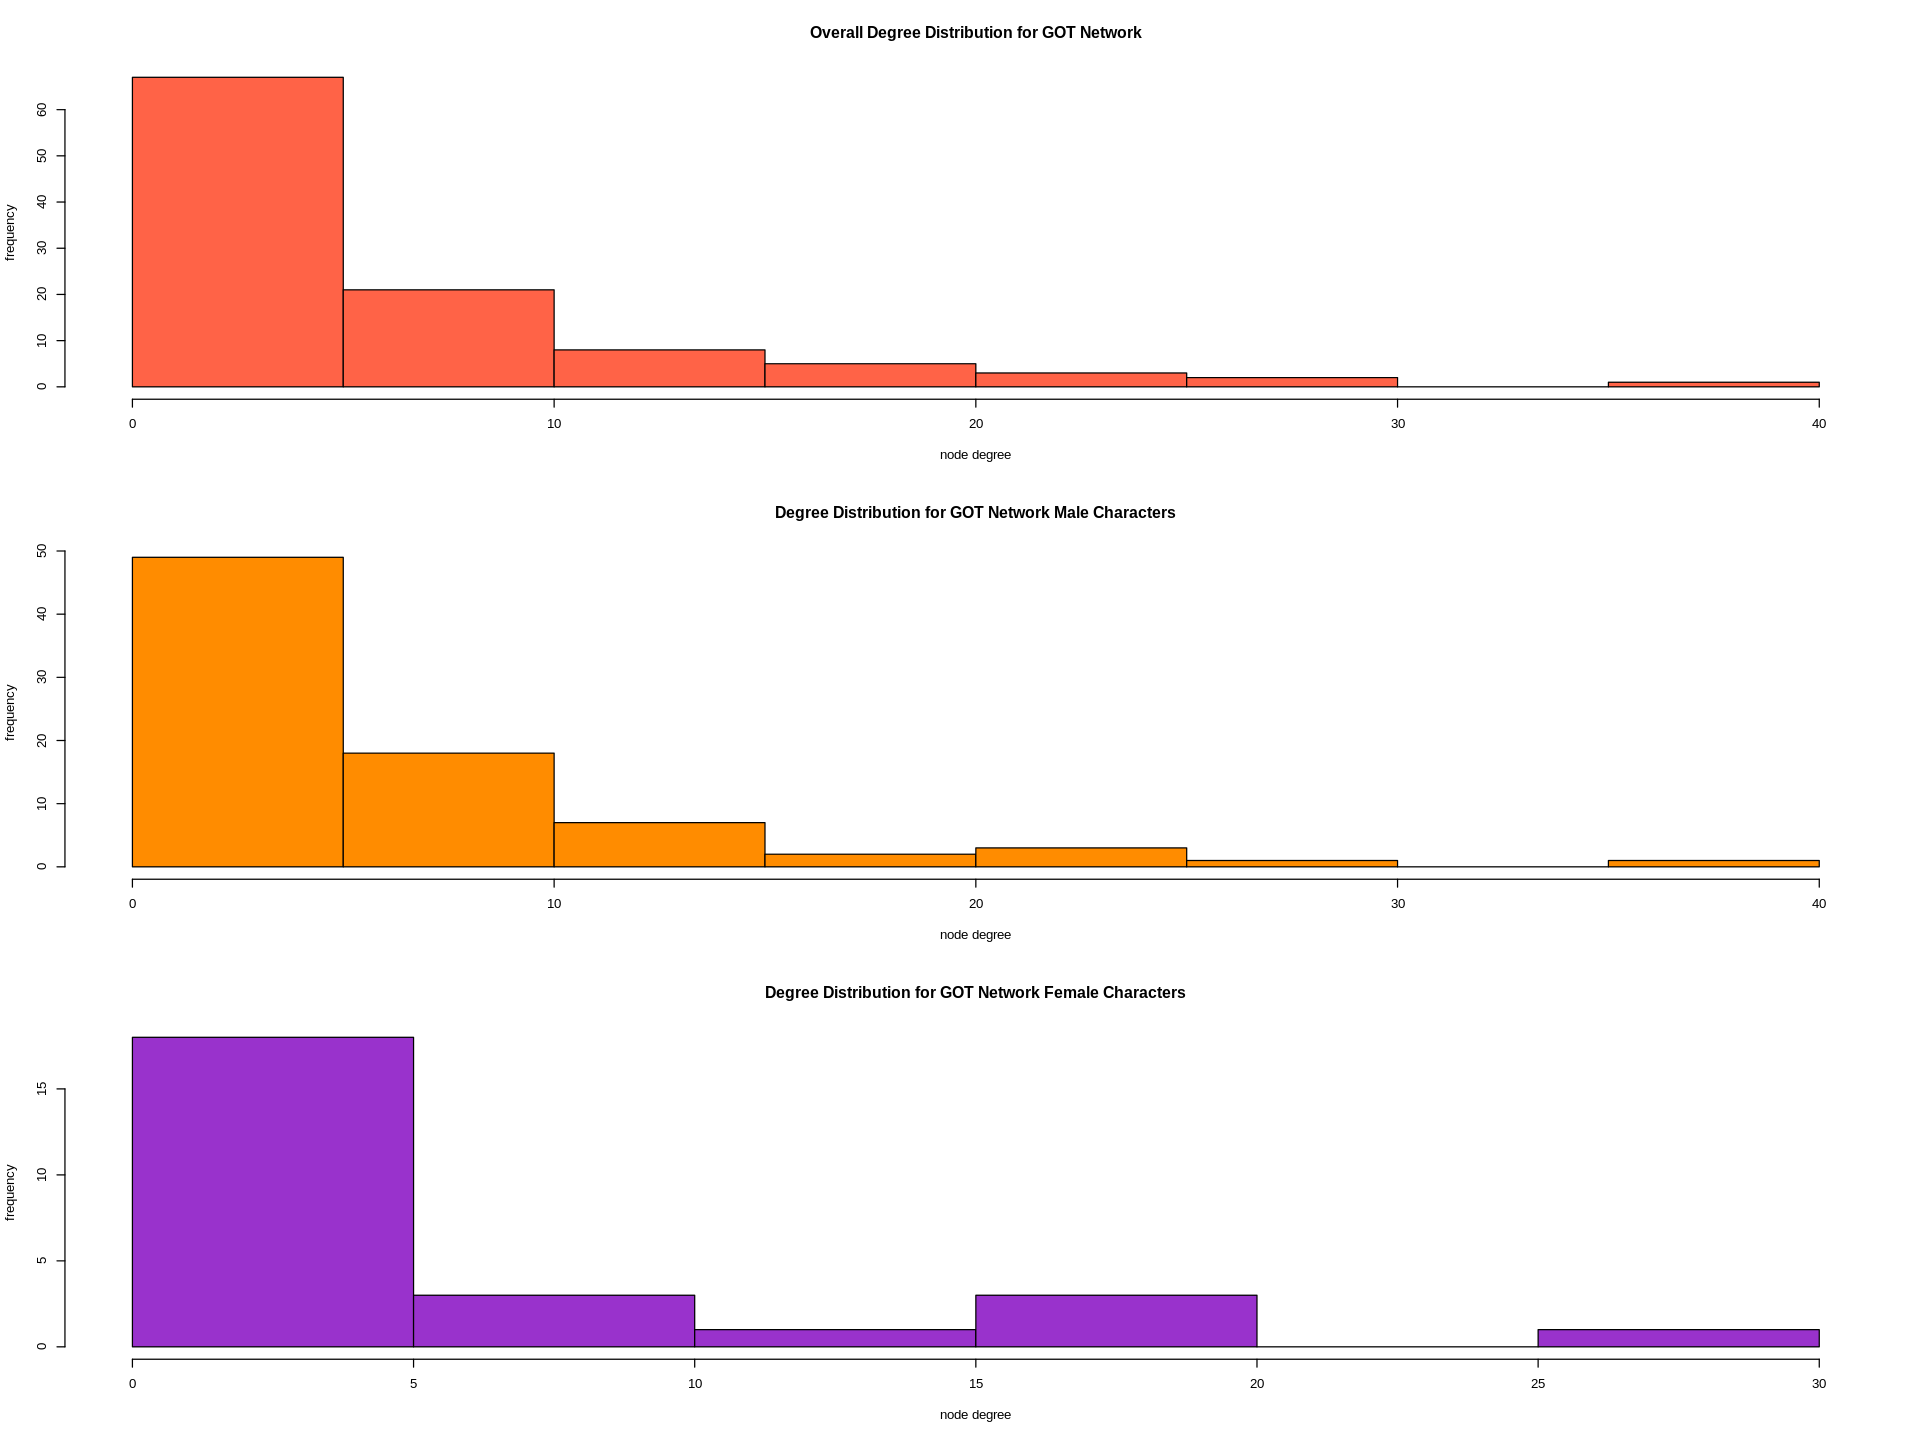

In [7]:
# sparsify by cut off mean(deg)
cut.off <- mean(deg)
net.sp <- delete_edges(net, E(net)[Weight<cut.off])
plot(net.sp) 

# distances from tyrion (top degree character)
dist.from.T <- distances(net, v=V(net)[Label=="Tyrion"], to=V(net), weights=NA)

# Set colors to plot the distances:
oranges <- colorRampPalette(c("dark red", "gold"))
col <- oranges(max(dist.from.T)+1)
col <- col[dist.from.T +1]

plot(net, vertex.color=col, vertex.label=dist.from.T, edge.arrow.size=.3, 
     vertex.label.color="black", cex = 0.3)

# let's look at the distribution of the degrees
par(mfrow=c(3,1))

hist(deg, col = 'tomato', xlab = 'node degree', ylab='frequency', main= 'Overall Degree Distribution for GOT Network')
# power law

deg_data<-data.frame(deg)
deg_data$gender<-V(net)$gender
hist(deg_data[deg_data$gender=='m', 'deg'], col='darkorange', xlab = 'node degree', ylab='frequency', main='Degree Distribution for GOT Network Male Characters')
hist(deg_data[deg_data$gender=='f', 'deg'], col='darkorchid', xlab = 'node degree', ylab='frequency', main='Degree Distribution for GOT Network Female Characters')

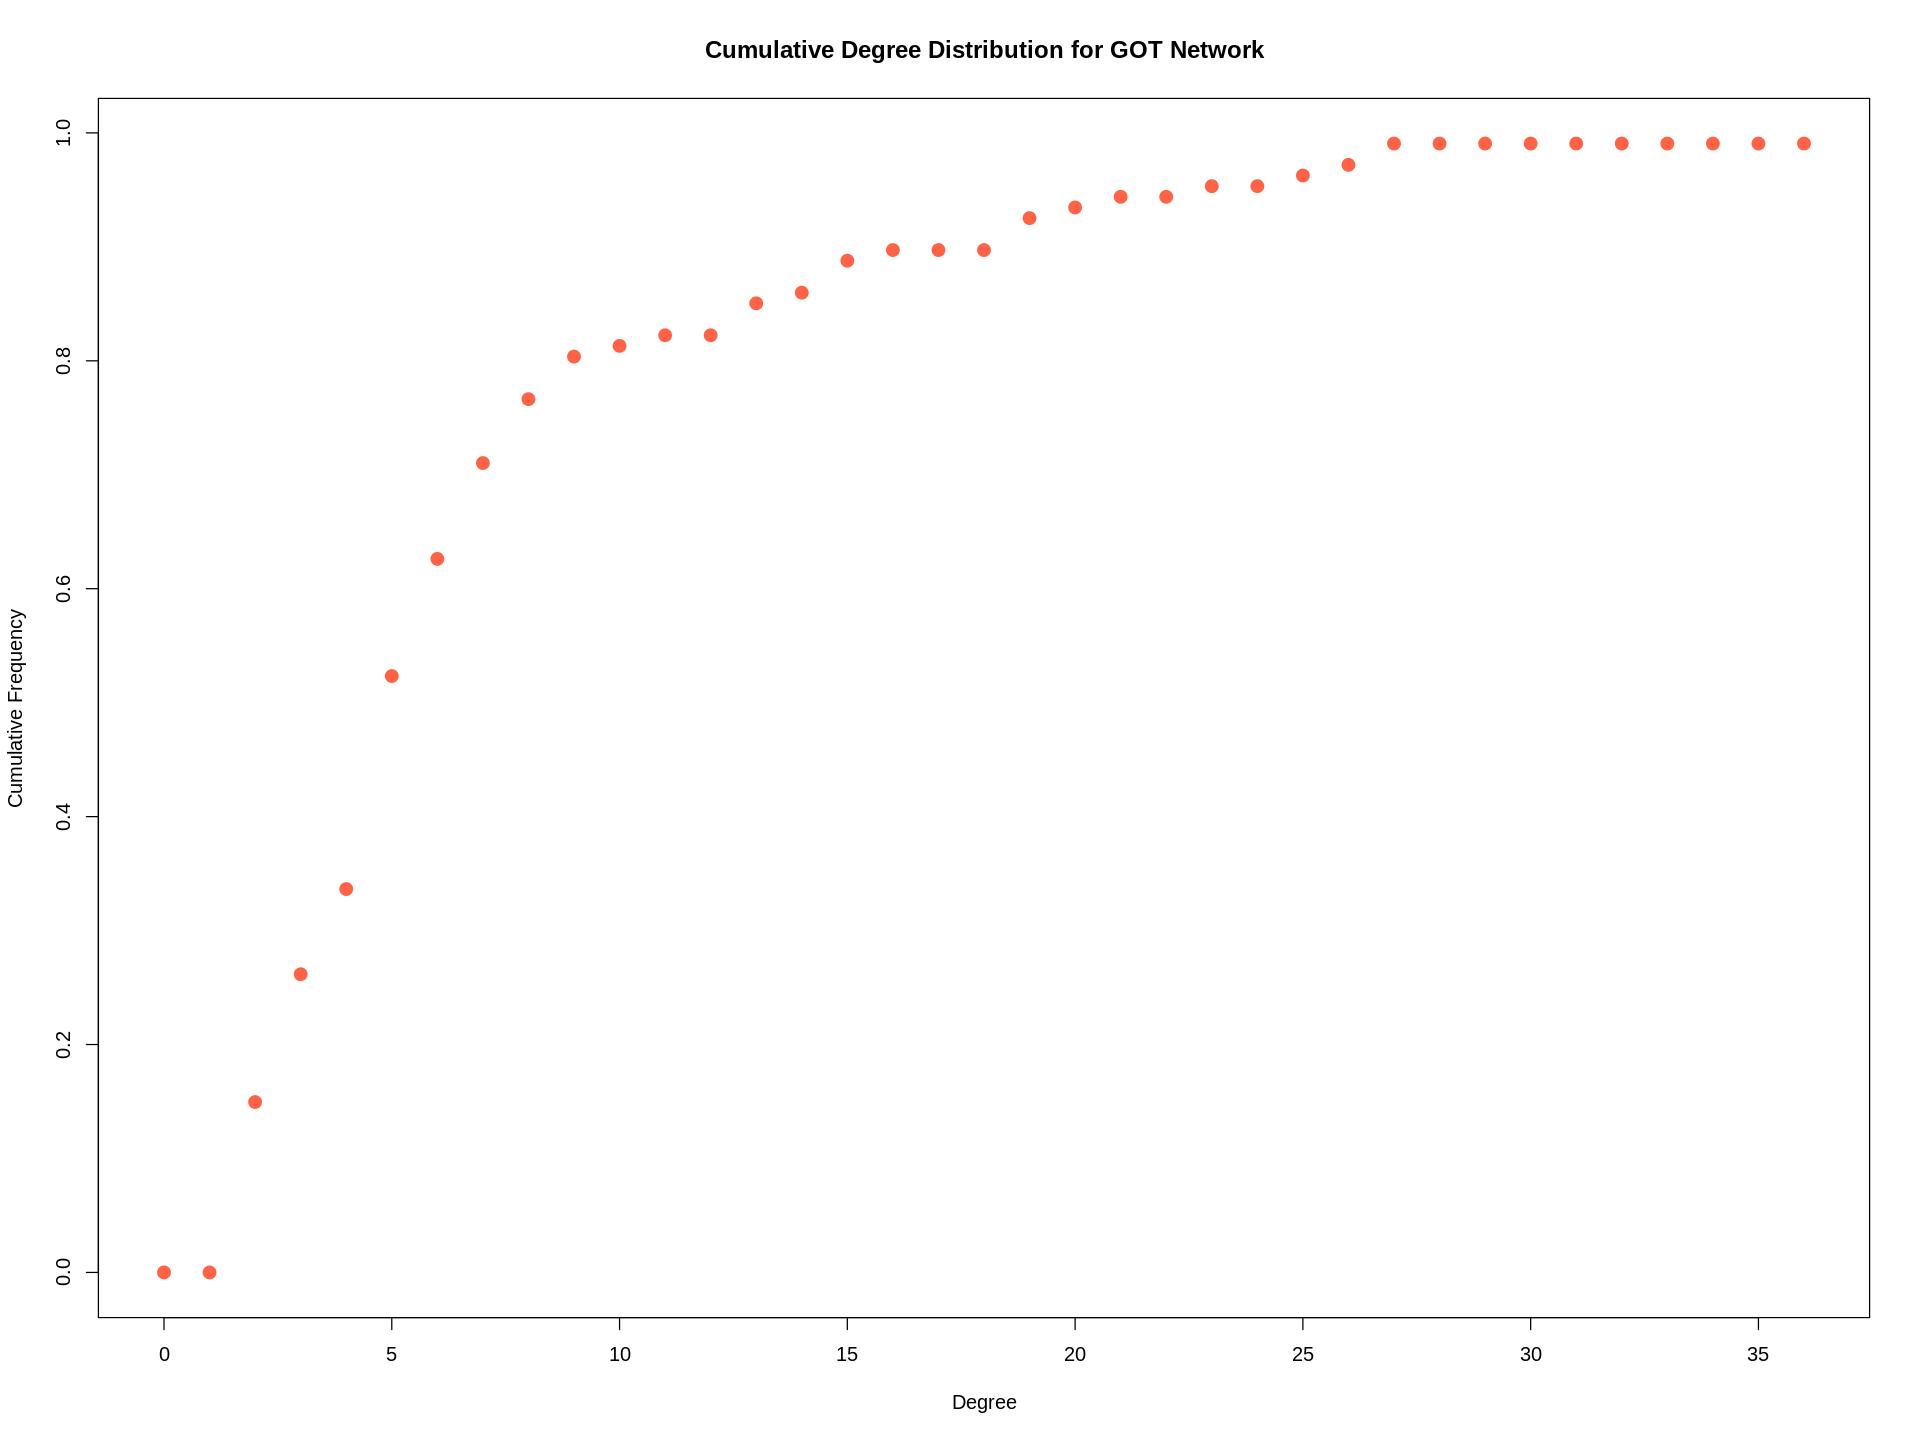

In [8]:
deg.dist <- degree_distribution(net, cumulative=T, mode="all")
plot( x=0:max(degree(net)), y=1-deg.dist, pch=19, cex=1.4, col="tomato", 
      xlab="Degree", ylab="Cumulative Frequency")
title('Cumulative Degree Distribution for GOT Network')

In [9]:
# Part 2: Which nodes are the most important in the network?

# let's examine who top nodes are:
top_15<-V(net)[order(V(net)$size, decreasing = T)][1:15]$Label
print(top_15)
# top_15 by gender indicates that hub nodes tend to be male by 2:1 ratio (10:5).

# reduces to 4:1 ratio amongst all characters
V(net)$gender[names(V(net)) %in% top_15] %>% table()
V(net)$gender %>% table() # total gender ratio
# stark is the most popular surname and political lean
V(net)$family.name[names(V(net)) %in% top_15] %>% table()
V(net)$politics[names(V(net)) %in% top_15] %>% table()
# kings landing is the most popular geography
V(net)$geography[names(V(net)) %in% top_15] %>% table()

 [1] "Tyrion"   "Jon"      "Sansa"    "Robb"     "Jaime"    "Tywin"   
 [7] "Cersei"   "Arya"     "Robert"   "Joffrey"  "Catelyn"  "Samwell" 
[13] "Bran"     "Stannis"  "Daenerys"


.
 f  m 
 5 10 

.
 f  m 
26 81 

.
baratheon lannister      snow     stark targaryen     tarly 
        3         4         1         5         1         1 

.
            baratheon  lannister nightwatch    stannis      stark  targaryen 
         1          2          2          2          1          5          2 

.
  dragonstone         essos kings_landing          wall    winterfell 
            1             1             6             2             5 

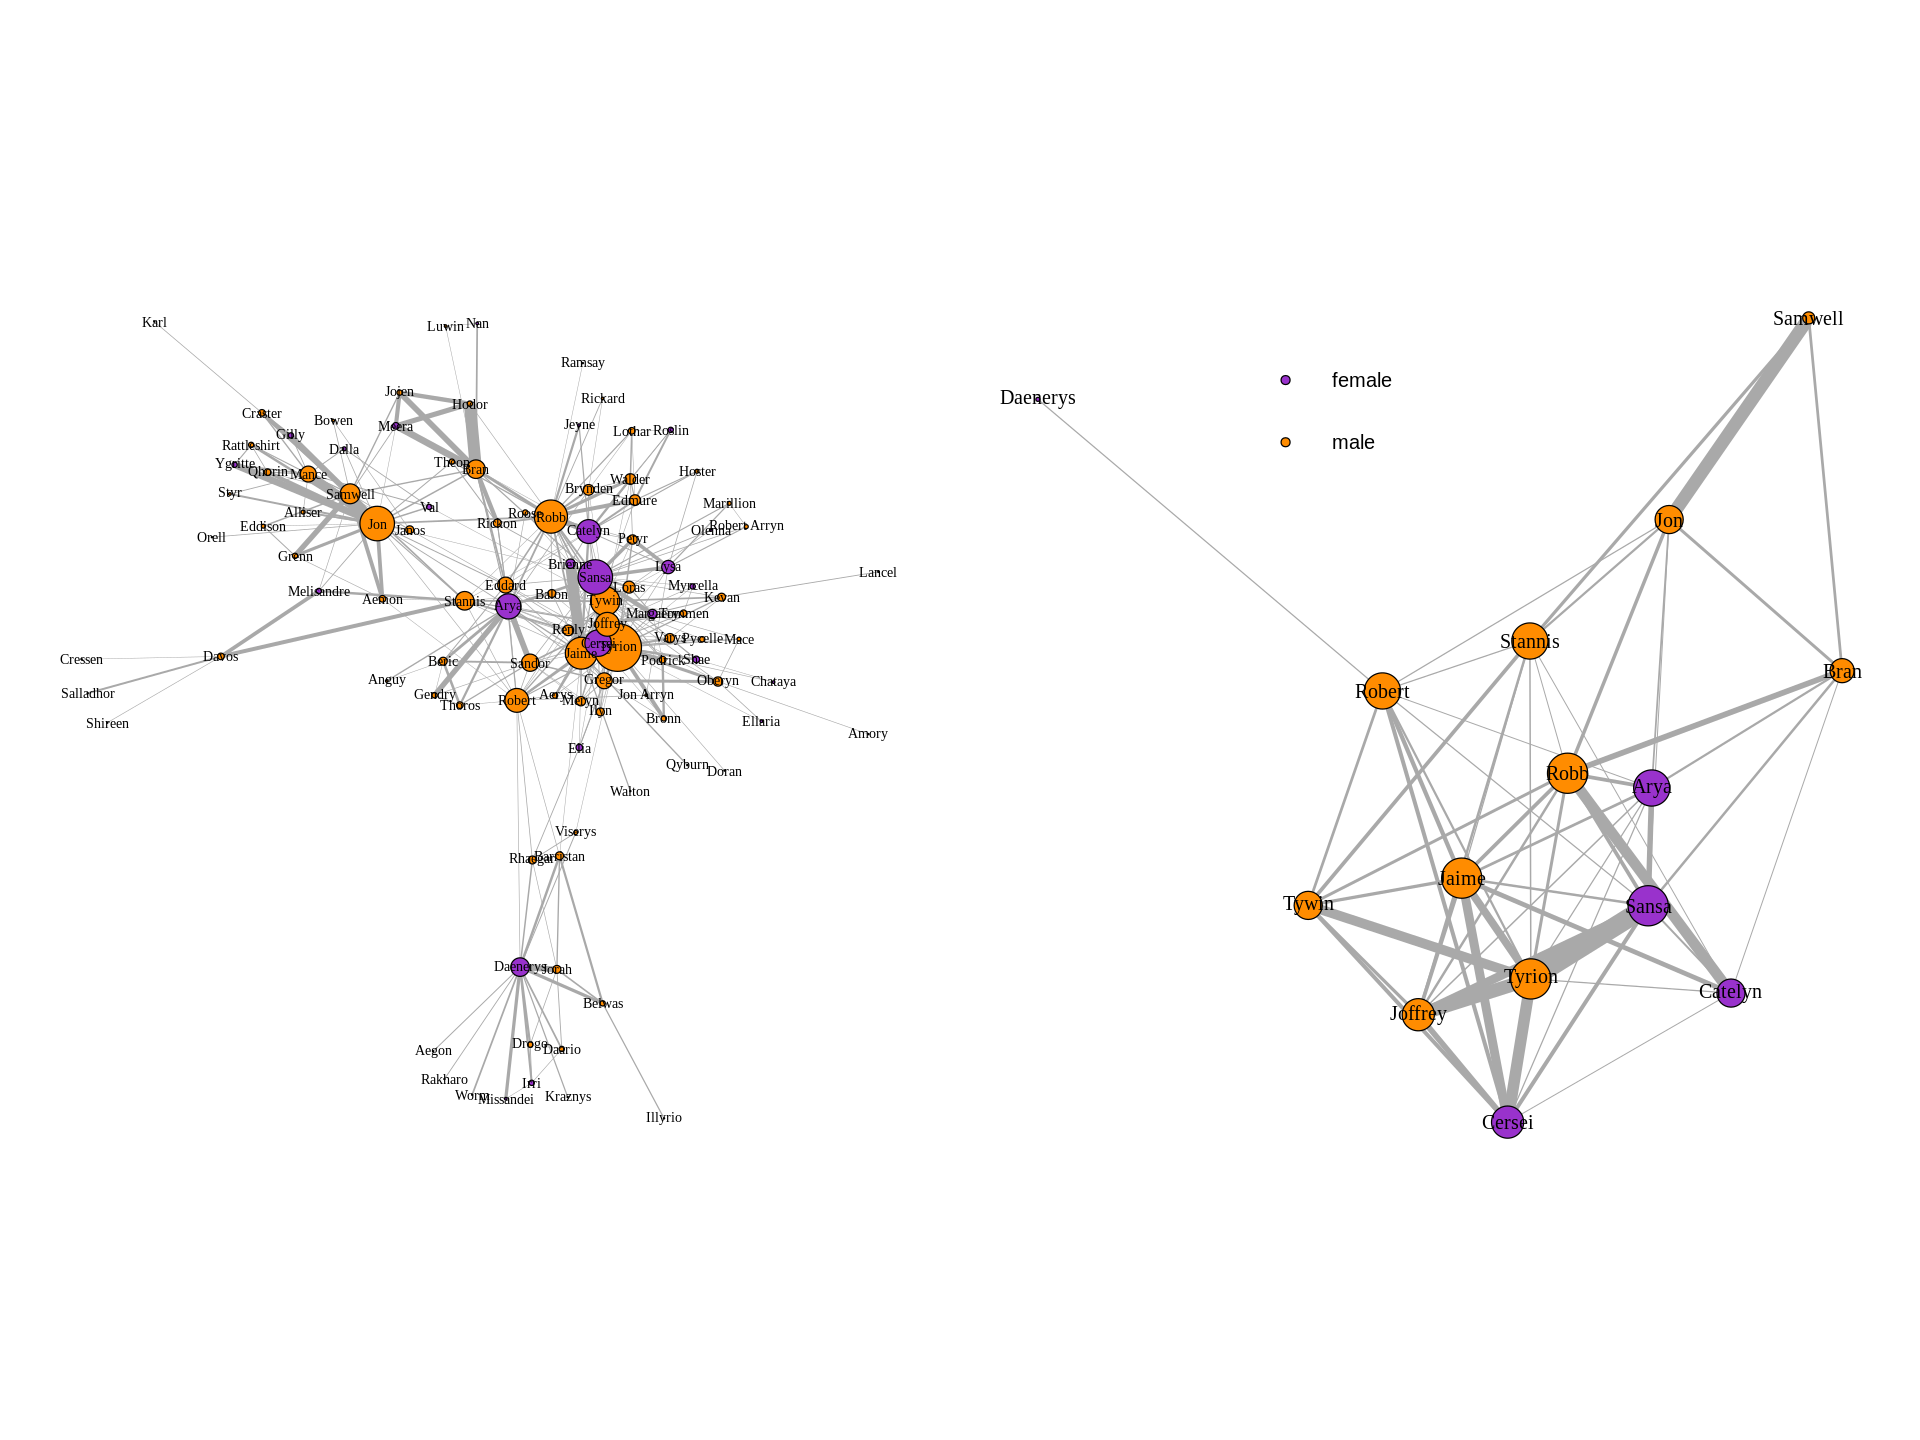

In [10]:
# subgraph of hub nodes to see how connected they are to each other
V(net)$selected <- 0
V(net)$selected[V(net)$Label %in% top_15] <- 1
subnet <- induced_subgraph(graph=net, v = which(V(net)$selected==1))

# recompute the degree
deg2 <- degree(subnet, mode="all", normalized = F)
V(subnet)$size <- deg2
E(subnet)$width <- E(subnet)$Weight/5

par(mfrow=c(1,2),mar=c(1,1,1,1))
# total plot 
colrs <- c("darkorchid", "darkorange")
V(net)$color <- colrs[as.factor(V(net)$gender)]
set.seed(2020)
plot(net, vertex.label.cex=0.7, vertex.label.color='black')

# subplot
colrs <- c("darkorchid", "darkorange")
V(subnet)$color <- colrs[as.factor(V(subnet)$gender)]
set.seed(2020)
plot(subnet, vertex.label.cex=1, vertex.label.color='black') 
legend(x=-0.5, y=1, c("female","male"), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex=1)


[1] 30

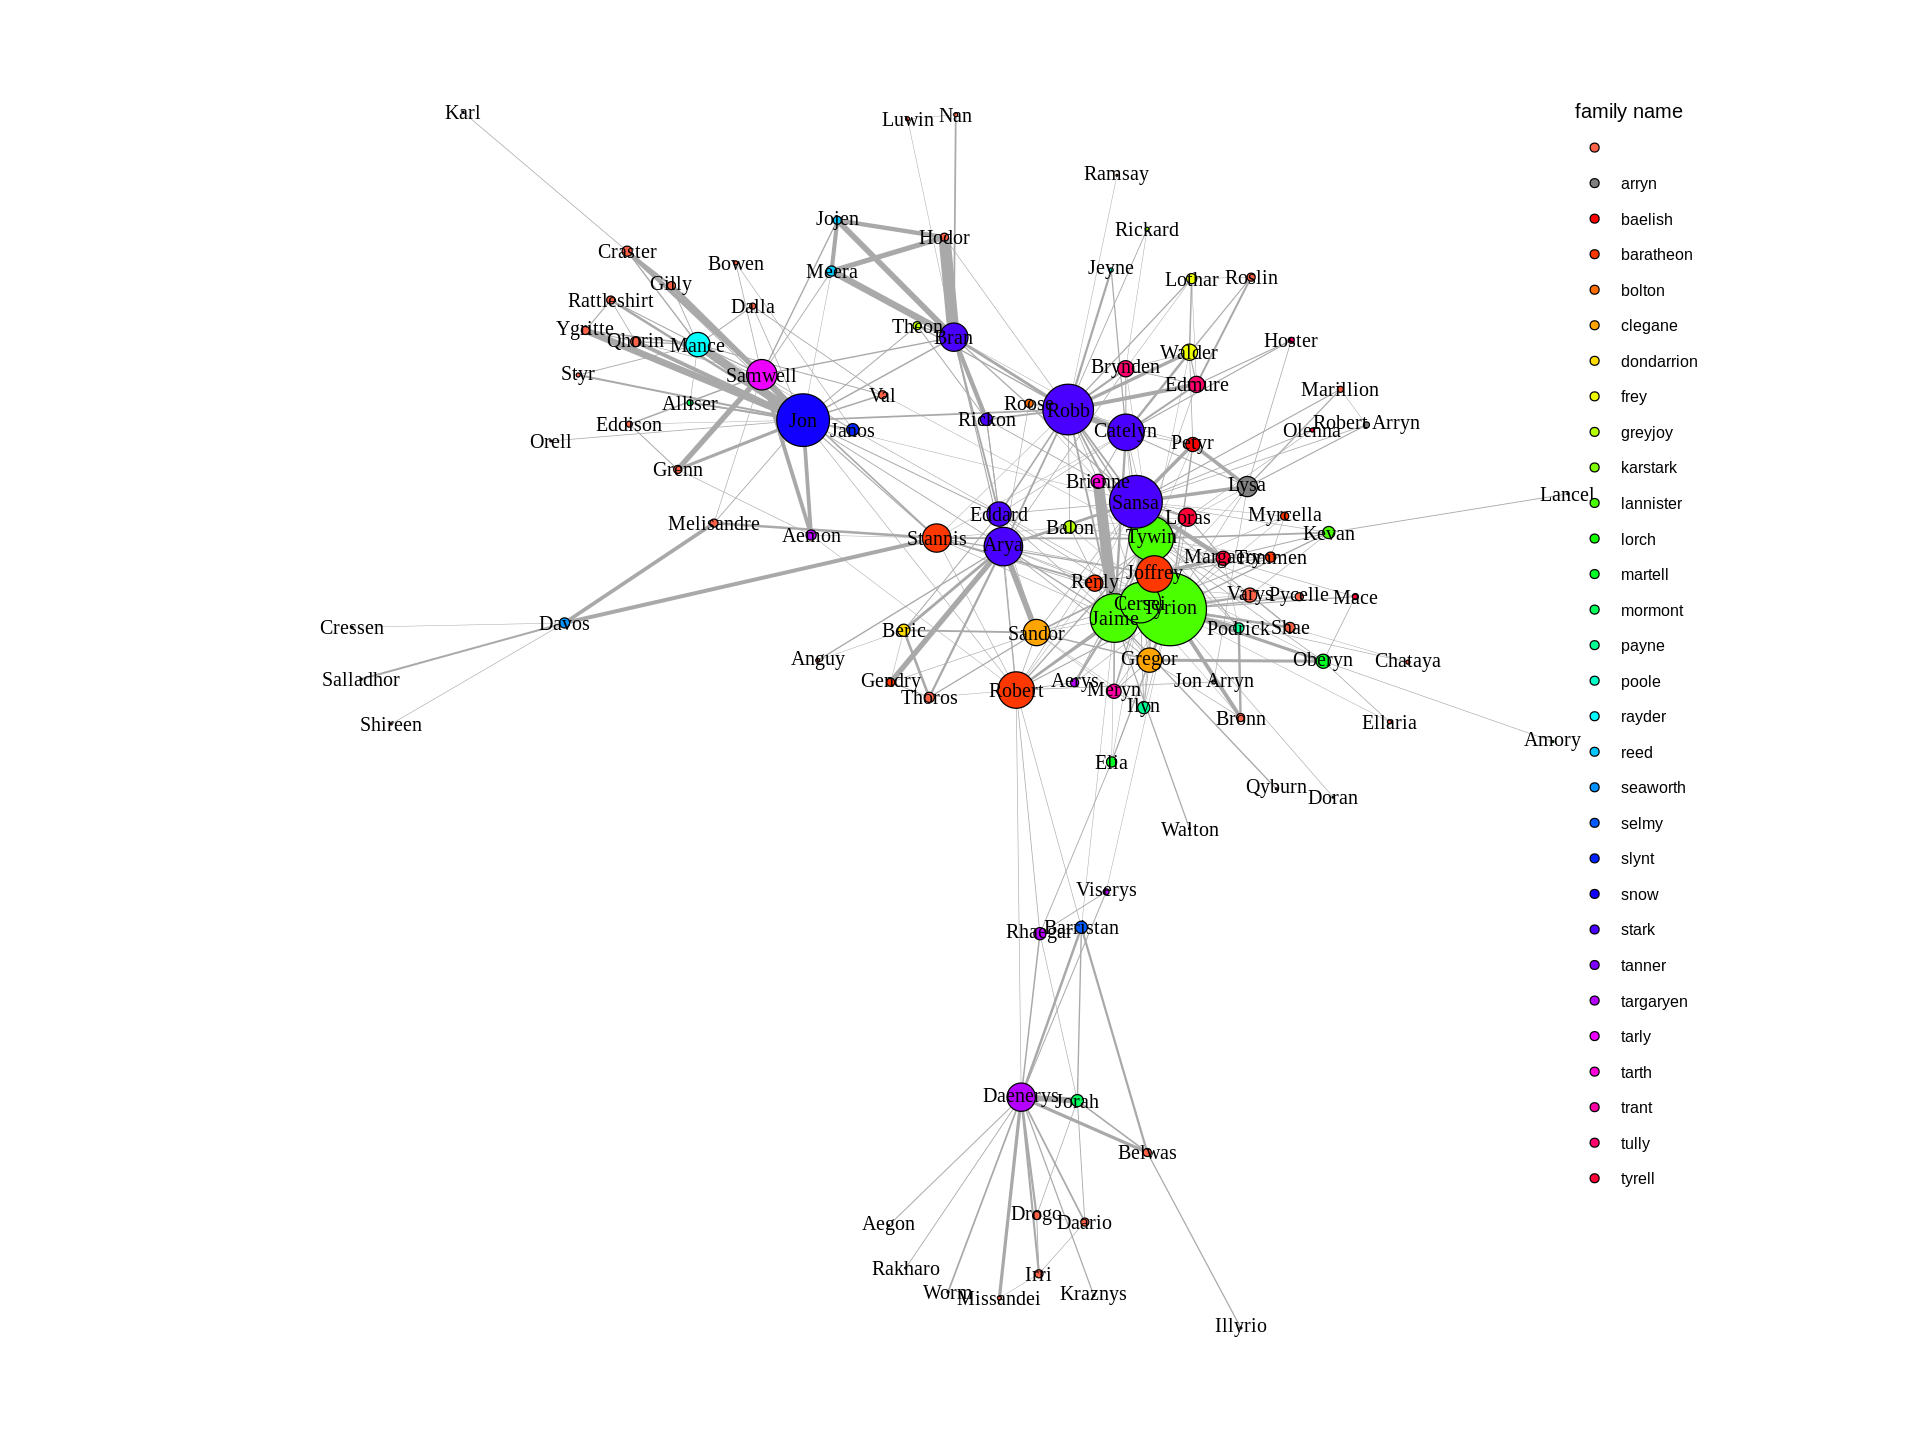

In [11]:
# Part 3: Can you provide a visualization with a nice layout?

# let's try to review the family name now

unique(V(net)$family.name) %>% length

colrs <- c("tomato", "gray50", rainbow(28))
V(net)$color <- colrs[as.factor(V(net)$family.name)]

par(mfrow=c(1,1),mar=c(1,1,1,1))
set.seed(2020)
plot(net, vertex.label.cex=1, vertex.label.color='black') 
legend(x=1, y=1, as.factor(V(net)$family.name) %>% levels(), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex = 0.8)
text('family name', x = 1.1, y=1, cex = 1, col='black')


[1] 12

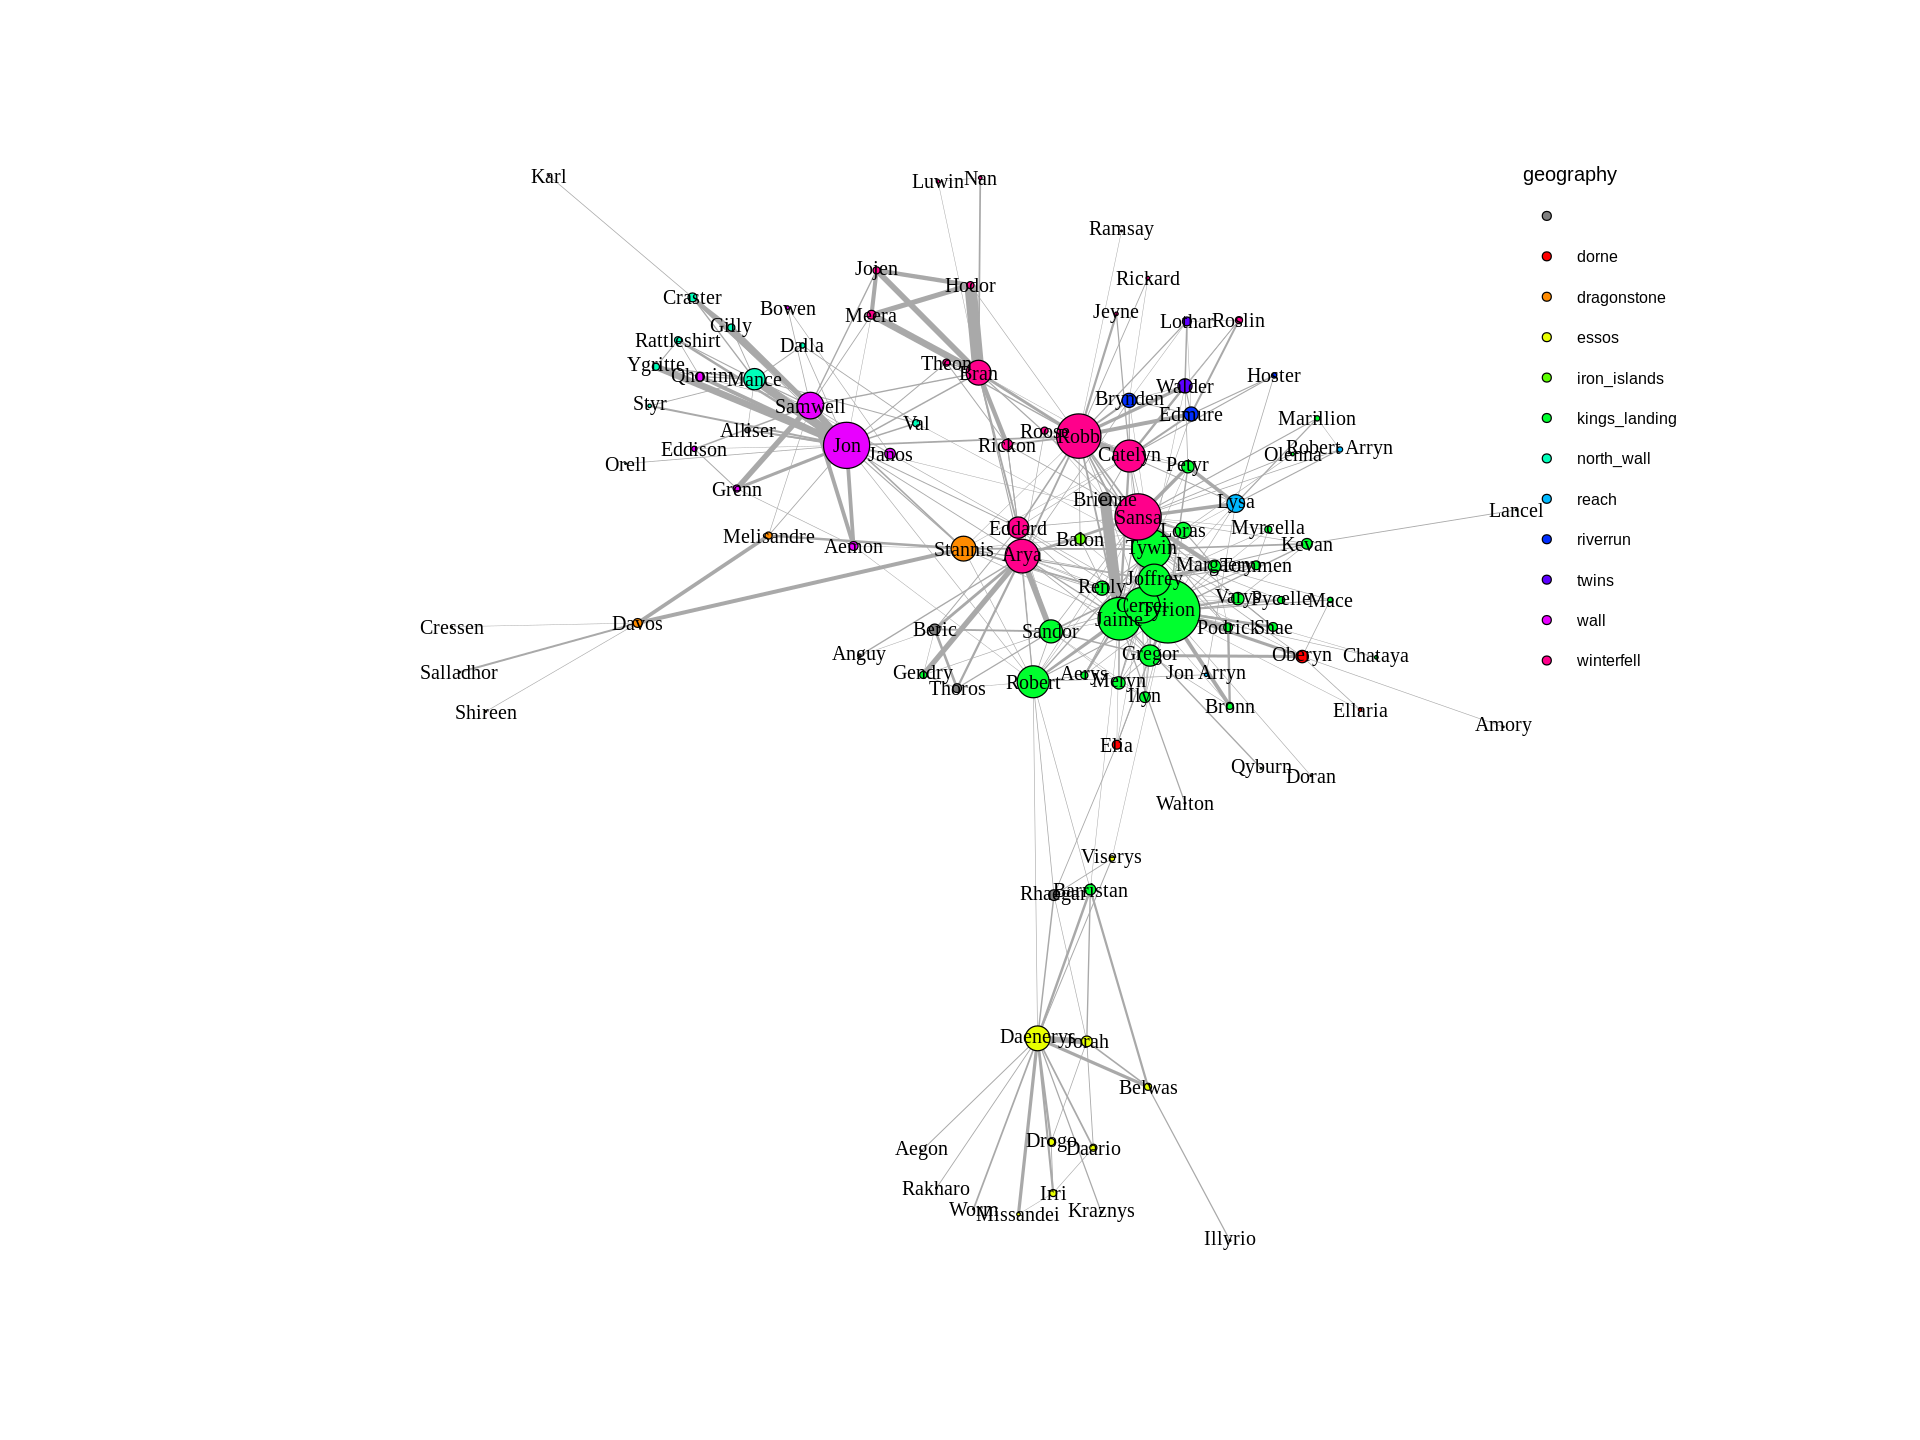

In [12]:
# geography

unique(V(net)$geography) %>% length
colrs <- c("gray50", rainbow(11))

V(net)$color <- colrs[as.factor(V(net)$geography)]
set.seed(2020)
plot(net, vertex.label.cex=1, vertex.label.color='black') 
legend(x=1, y=1, as.factor(V(net)$geography) %>% levels(), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex=0.8)
text('geography', x = 1.1, y=1, cex = 1, col='black')

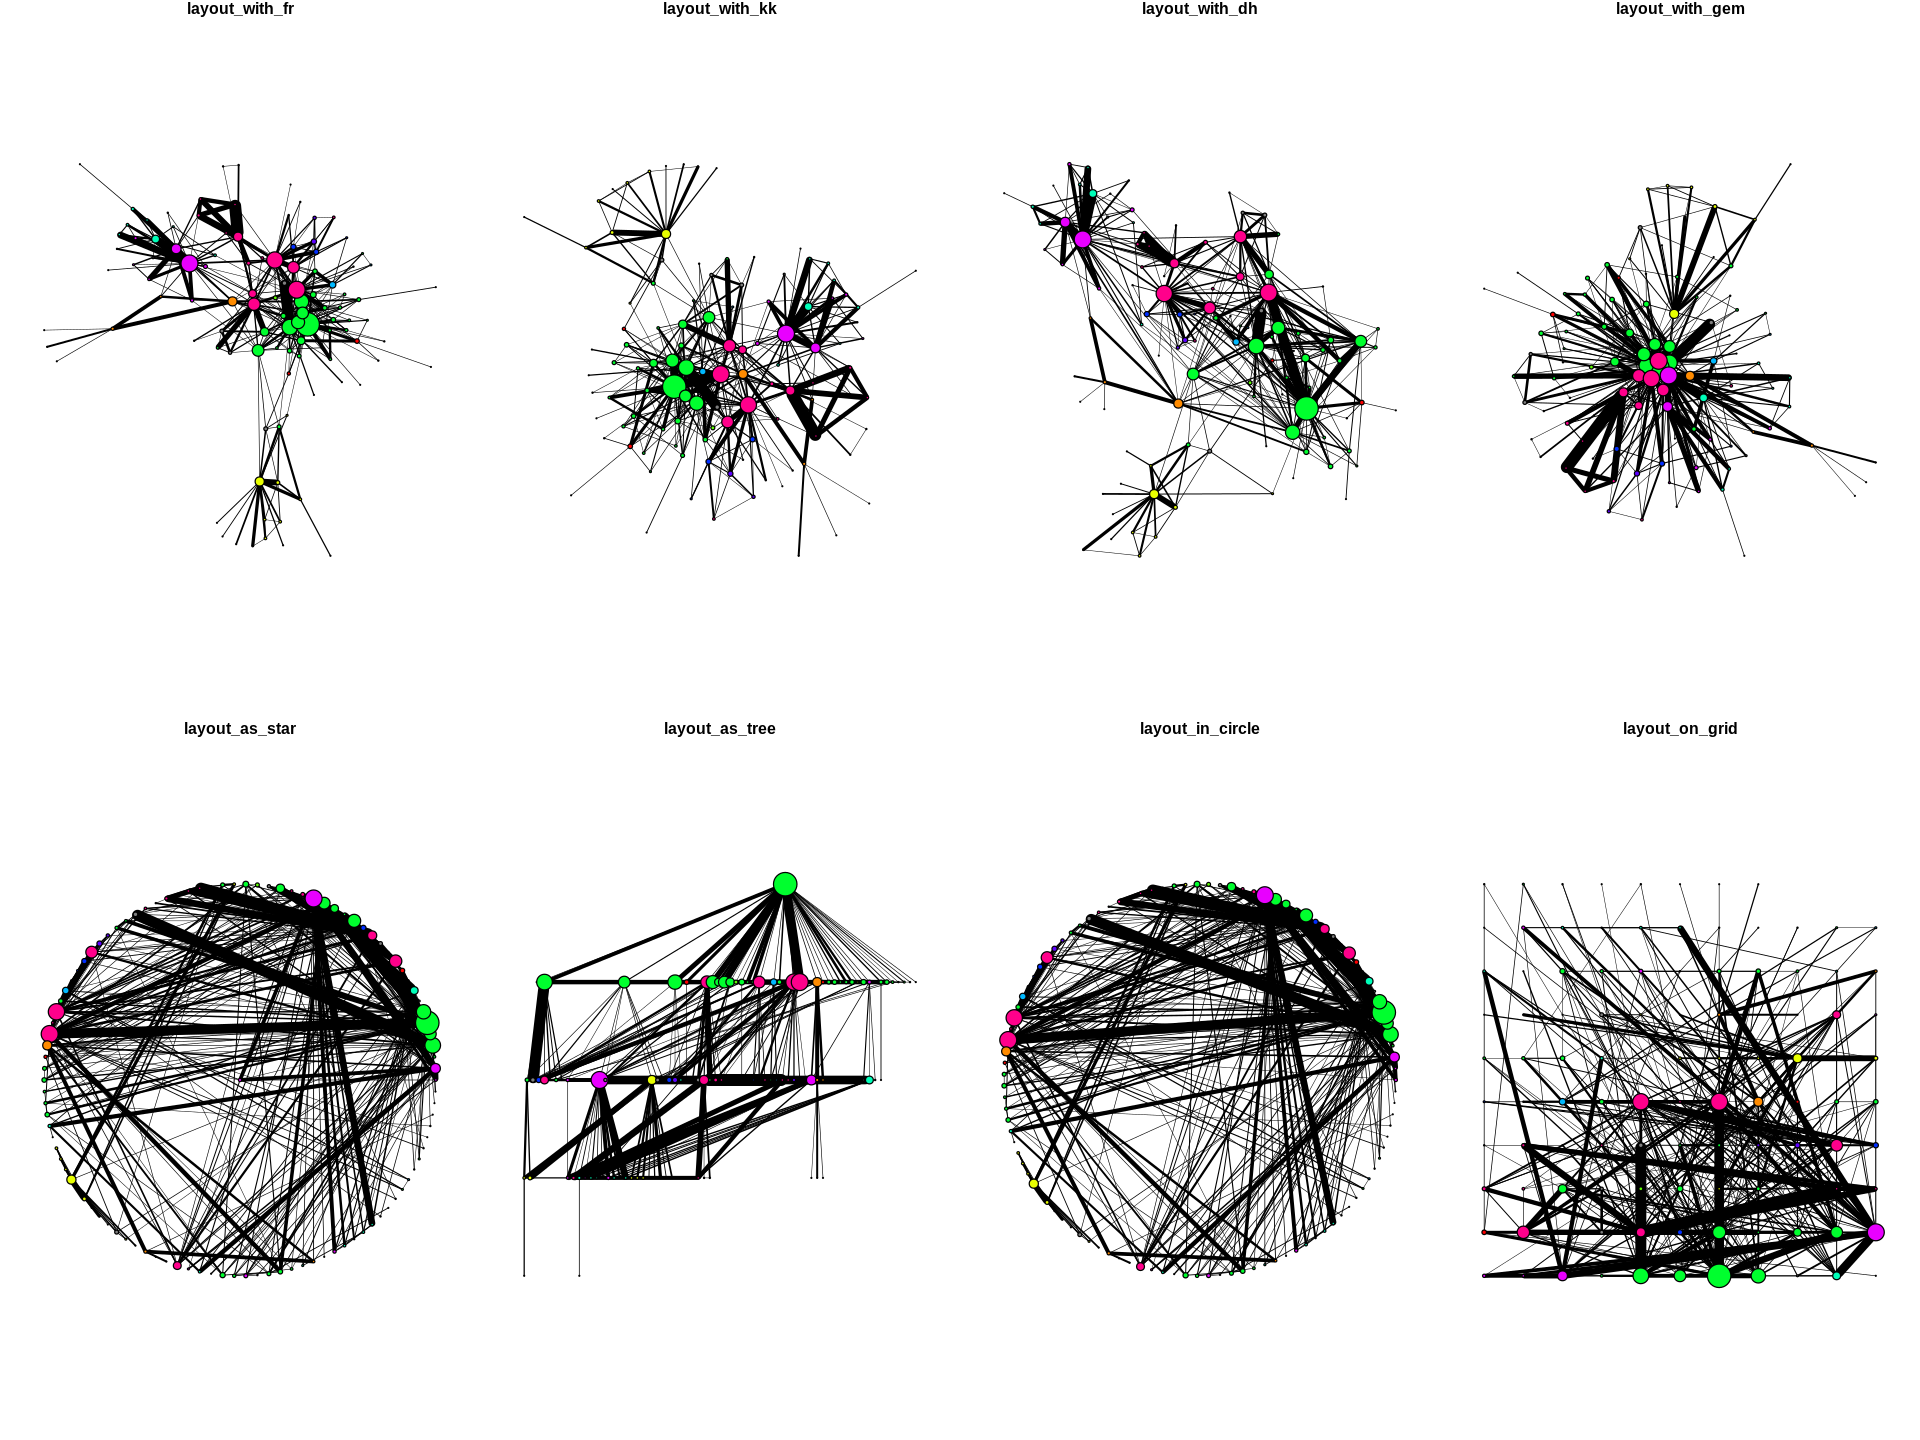

In [13]:
# try with other layout --> other layouts are not as easy distinguish as the default (layout_with_fr)
# source: https://dshizuka.github.io/networkanalysis/03_plots.html

set.seed(2020)
layouts = c("layout_with_fr", "layout_with_kk", "layout_with_dh", "layout_with_gem", "layout_as_star", "layout_as_tree", "layout_in_circle", "layout_on_grid")
par(mfrow=c(2,4), mar=c(1,1,1,1))
for(layout in layouts){
  l=do.call(layout, list(net))
  plot(net, layout=l, edge.color="black", vertex.label=NA, main=layout)
}

[1] 19

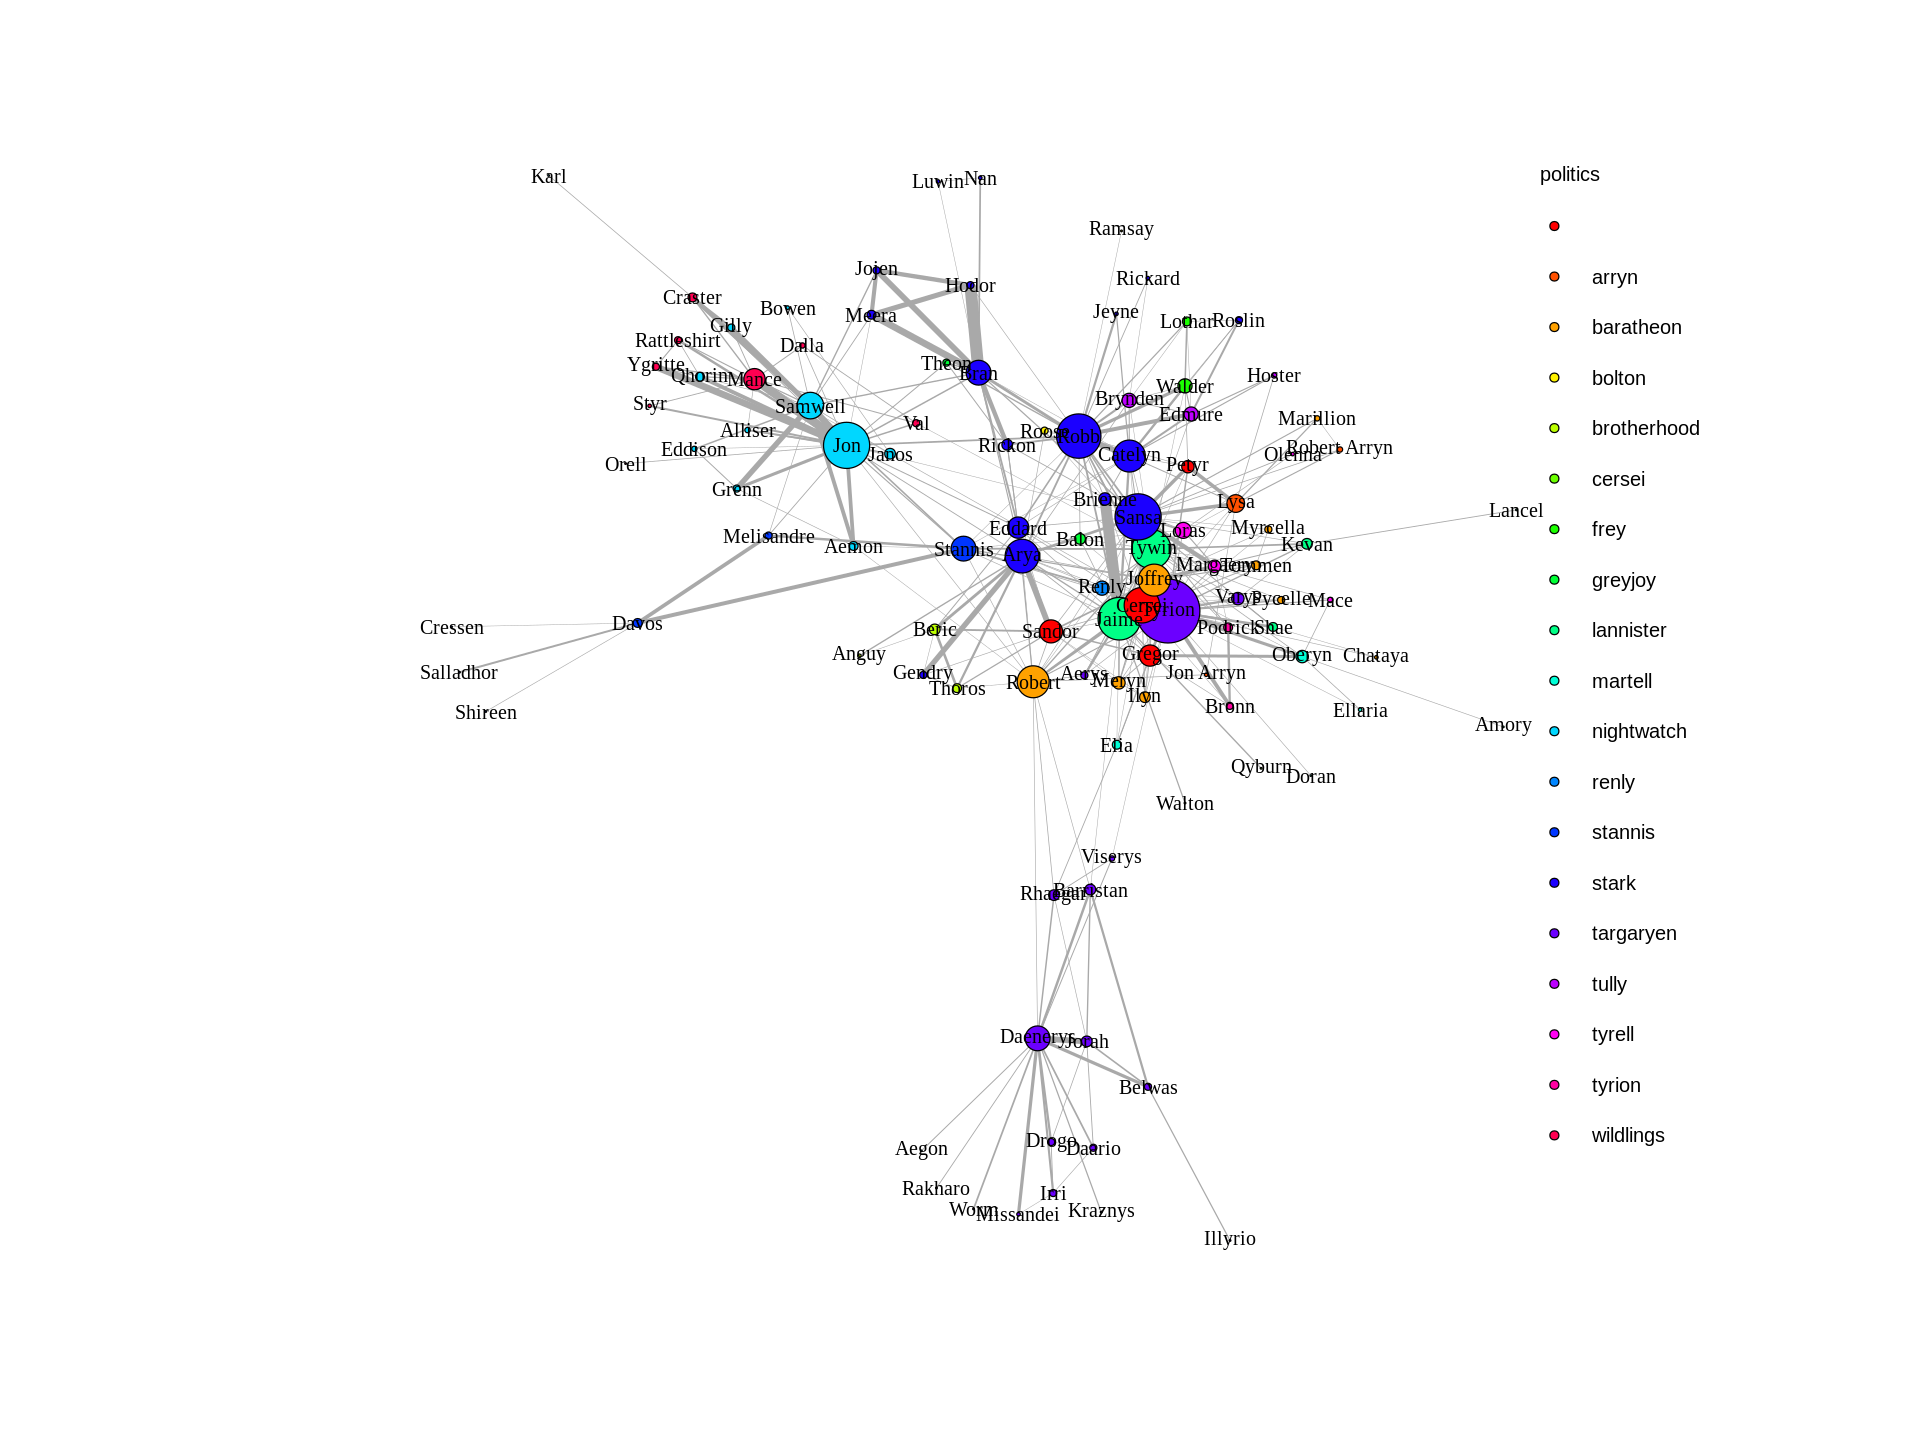

In [14]:
# politics is murky in the center, but well defined at the outskirts
unique(V(net)$politics) %>% length
colrs <- c(rainbow(19))

V(net)$color <- colrs[as.factor(V(net)$politics)]
set.seed(2020)
plot(net, vertex.label.cex=1, vertex.label.color='black') 
legend(x=1, y=1, as.factor(V(net)$politics) %>% levels(), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex=1)
text('politics', x = 1.1, y=1, cex = 1, col='black')

[1] 0.5999021

       Aemon        Grenn      Samwell        Aerys        Jaime       Robert 
           4            4            4            1            1            1 
      Tyrion        Tywin      Alliser        Mance        Amory       Oberyn 
           1            1            4            4            1            1 
        Arya        Anguy        Beric         Bran      Brynden       Cersei 
           7            7            7            6            2            1 
      Gendry       Gregor      Joffrey          Jon       Rickon        Roose 
           7            1            1            4            6            2 
      Sandor       Thoros        Balon        Loras       Belwas    Barristan 
           7            7            1            1            5            5 
     Illyrio        Hodor        Jojen        Luwin        Meera          Nan 
           5            6            6            6            6            6 
       Theon      Brienne        Bronn      Podrick 

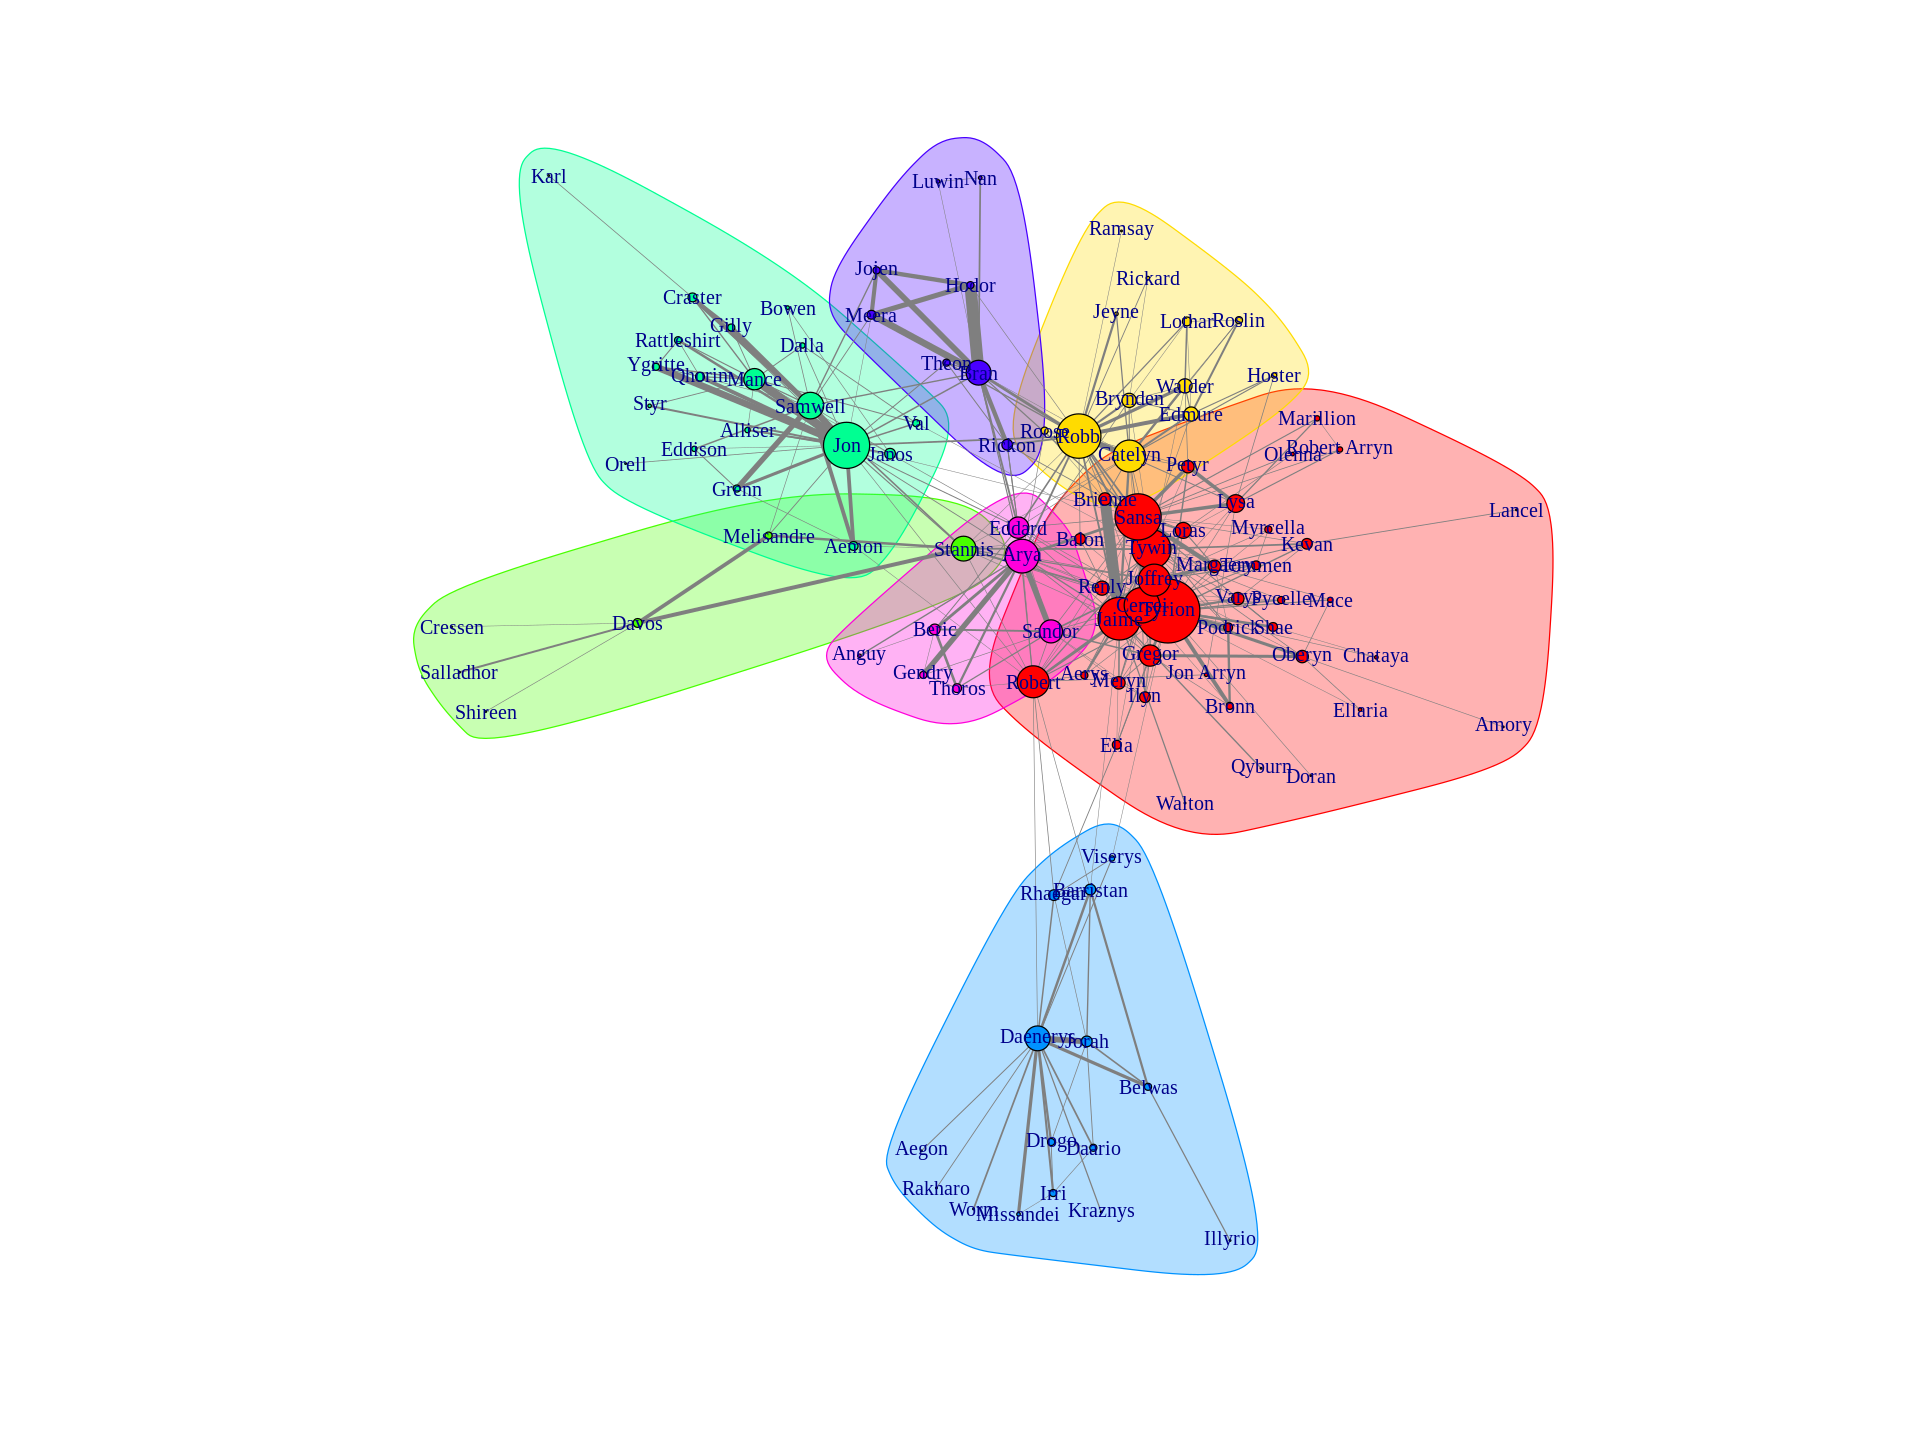

In [15]:
# Part 4: Are there any community structures? If so, can you provide any interpretation?

#wc <- cluster_walktrap(net, weights = E(net)$Weight)
fg <- cluster_fast_greedy(net, weights = E(net)$Weight)

modularity(fg)
membership(fg)

V(net)$community <- membership(fg)
cols <- rainbow(7)
V(net)$color <- cols[V(net)$community]

E(net)$color <- 'gray50'
new_cols <- cols[membership(fg)]
set.seed(2020)
plot(fg, net, new_cols, edge.color=E(net)$color)

[1] 0.5989398

       Aemon        Grenn      Samwell        Aerys        Jaime       Robert 
           2            2            2            1            1            1 
      Tyrion        Tywin      Alliser        Mance        Amory       Oberyn 
           1            1            2            2            1            1 
        Arya        Anguy        Beric         Bran      Brynden       Cersei 
           7            7            7            6            5            1 
      Gendry       Gregor      Joffrey          Jon       Rickon        Roose 
           7            1            1            2            6            5 
      Sandor       Thoros        Balon        Loras       Belwas    Barristan 
           7            7            1            1            3            3 
     Illyrio        Hodor        Jojen        Luwin        Meera          Nan 
           3            6            6            6            6            6 
       Theon      Brienne        Bronn      Podrick 

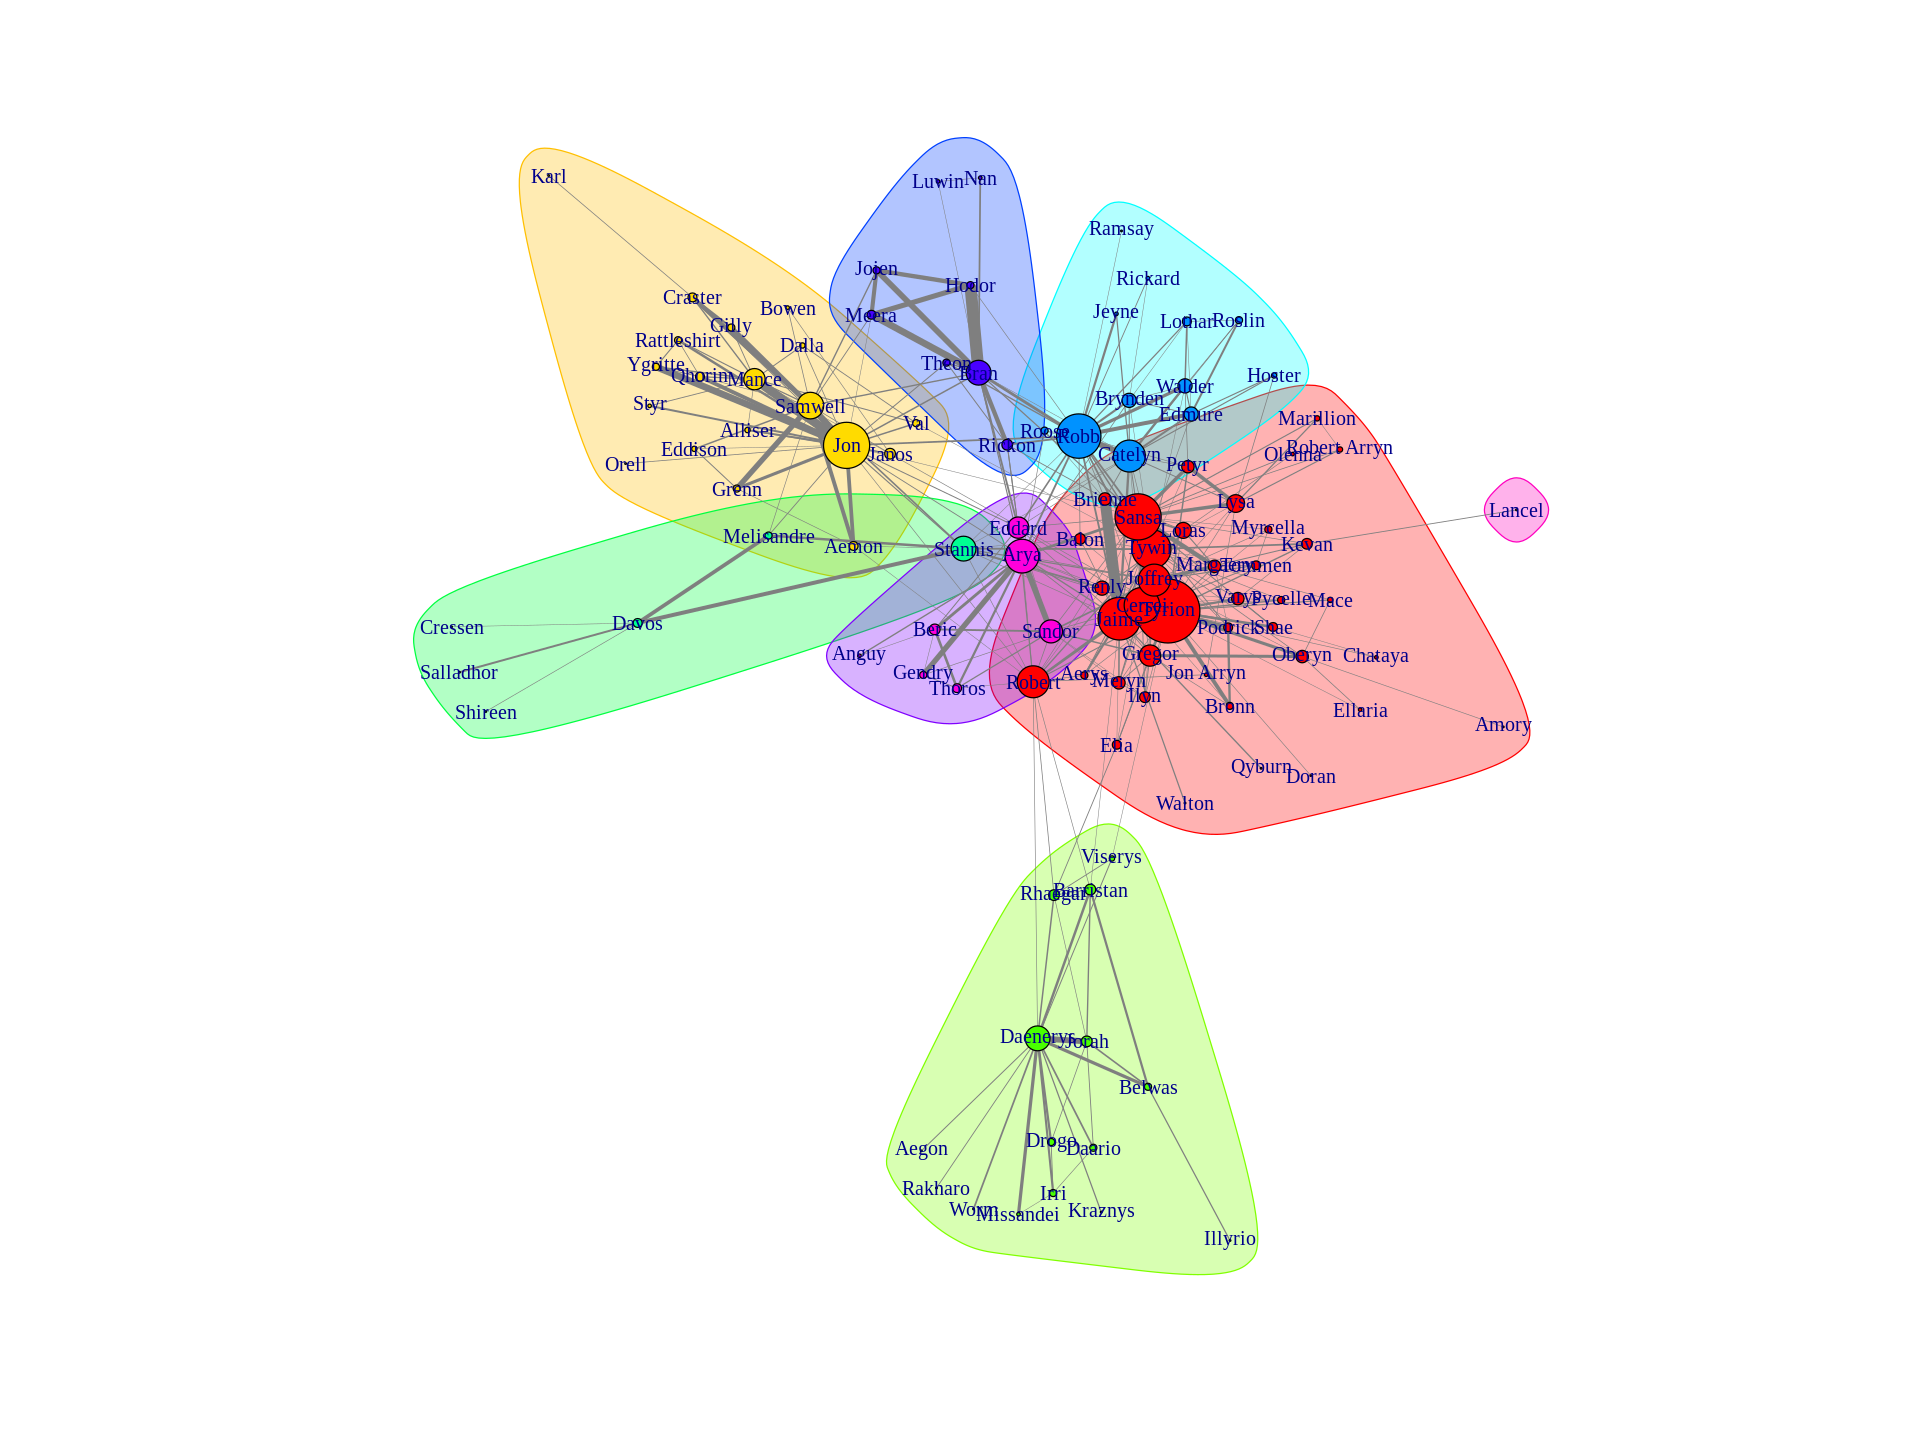

In [16]:
wc <- cluster_walktrap(net, weights = E(net)$Weight)

modularity(wc)
membership(wc)

V(net)$community <- membership(wc)
cols <- rainbow(7)
V(net)$color <- cols[V(net)$community]

E(net)$color <- 'gray50'
new_cols <- cols[membership(wc)]
set.seed(2020)
plot(wc, net, new_cols, edge.color=E(net)$color)

[1] 0.5999021

       Aemon        Grenn      Samwell        Aerys        Jaime       Robert 
           4            4            4            1            1            1 
      Tyrion        Tywin      Alliser        Mance        Amory       Oberyn 
           1            1            4            4            1            1 
        Arya        Anguy        Beric         Bran      Brynden       Cersei 
           7            7            7            6            2            1 
      Gendry       Gregor      Joffrey          Jon       Rickon        Roose 
           7            1            1            4            6            2 
      Sandor       Thoros        Balon        Loras       Belwas    Barristan 
           7            7            1            1            5            5 
     Illyrio        Hodor        Jojen        Luwin        Meera          Nan 
           5            6            6            6            6            6 
       Theon      Brienne        Bronn      Podrick 

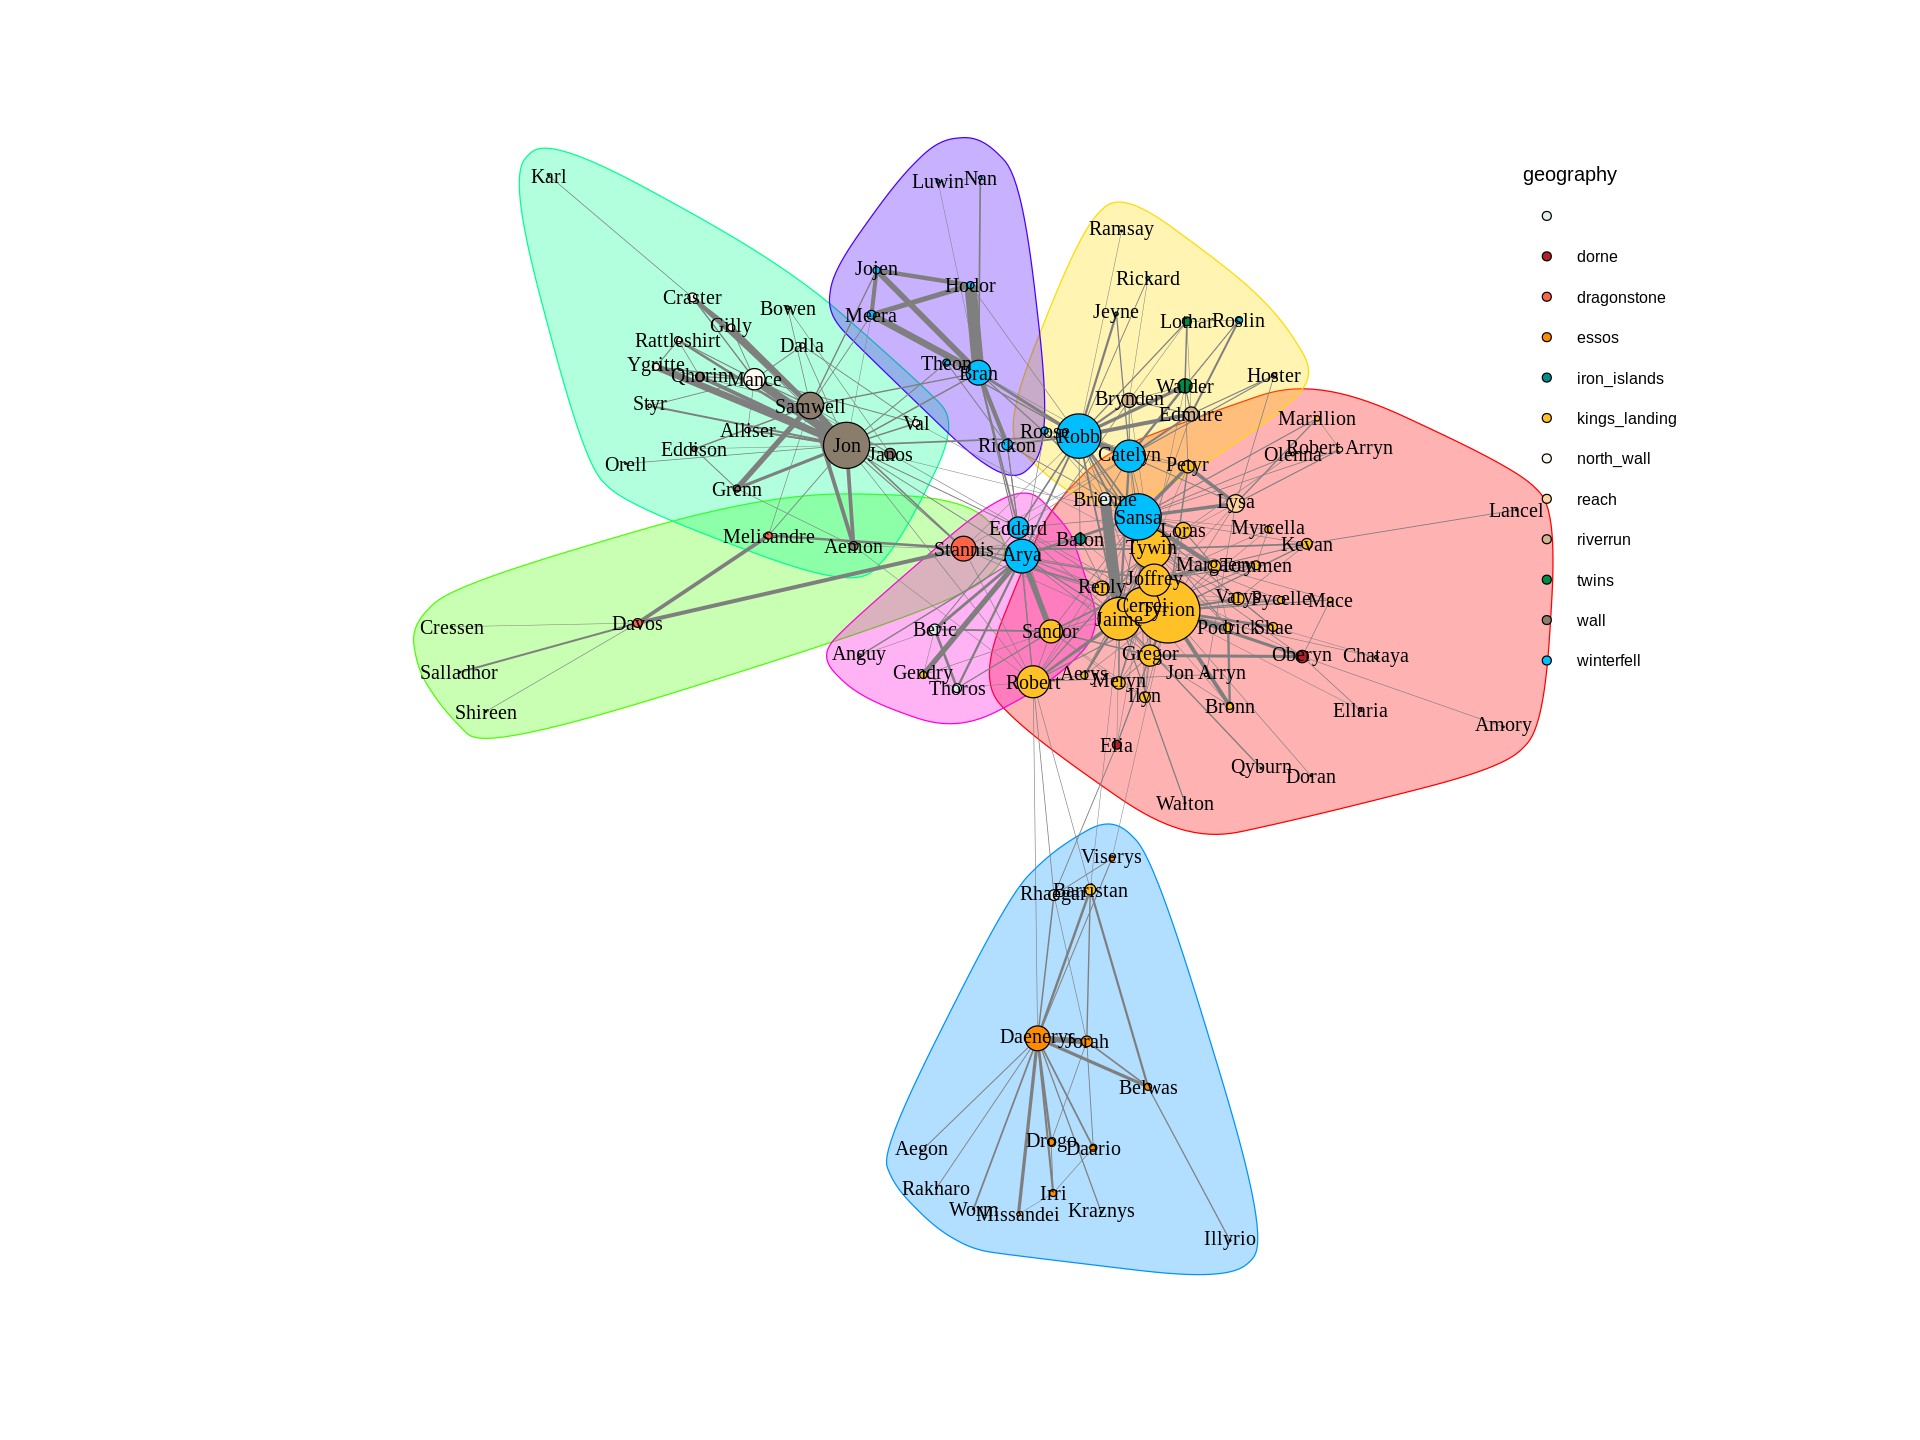

In [17]:
fg <- cluster_fast_greedy(net, weights = E(net)$Weight)

modularity(fg)
membership(fg)

V(net)$community <- membership(fg)
cols <- rainbow(7)
V(net)$color <- cols[V(net)$community]

E(net)$color <- 'gray50'

#unique(V(net)$geography) %>% length
#colrs <- c("gray50", rainbow(11))

#colors correspond roughtly to show geography
colrs <- c("azure2", 'firebrick', 'tomato', 'darkorange', 
           'darkcyan','goldenrod1', 'floralwhite', 'burlywood1', 'tan', 'springgreen4','bisque4','deepskyblue')

new_cols <- colrs[as.factor(V(net)$geography)]
set.seed(2020)
plot(fg, net, new_cols, edge.color=E(net)$color, vertex.label.color='black')
legend(x=1, y=1, as.factor(V(net)$geography) %>% levels(), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex=0.8)
text('geography', x = 1.1, y=1, cex = 1, col='black')

[1] 0.5999021

       Aemon        Grenn      Samwell        Aerys        Jaime       Robert 
           4            4            4            1            1            1 
      Tyrion        Tywin      Alliser        Mance        Amory       Oberyn 
           1            1            4            4            1            1 
        Arya        Anguy        Beric         Bran      Brynden       Cersei 
           7            7            7            6            2            1 
      Gendry       Gregor      Joffrey          Jon       Rickon        Roose 
           7            1            1            4            6            2 
      Sandor       Thoros        Balon        Loras       Belwas    Barristan 
           7            7            1            1            5            5 
     Illyrio        Hodor        Jojen        Luwin        Meera          Nan 
           5            6            6            6            6            6 
       Theon      Brienne        Bronn      Podrick 

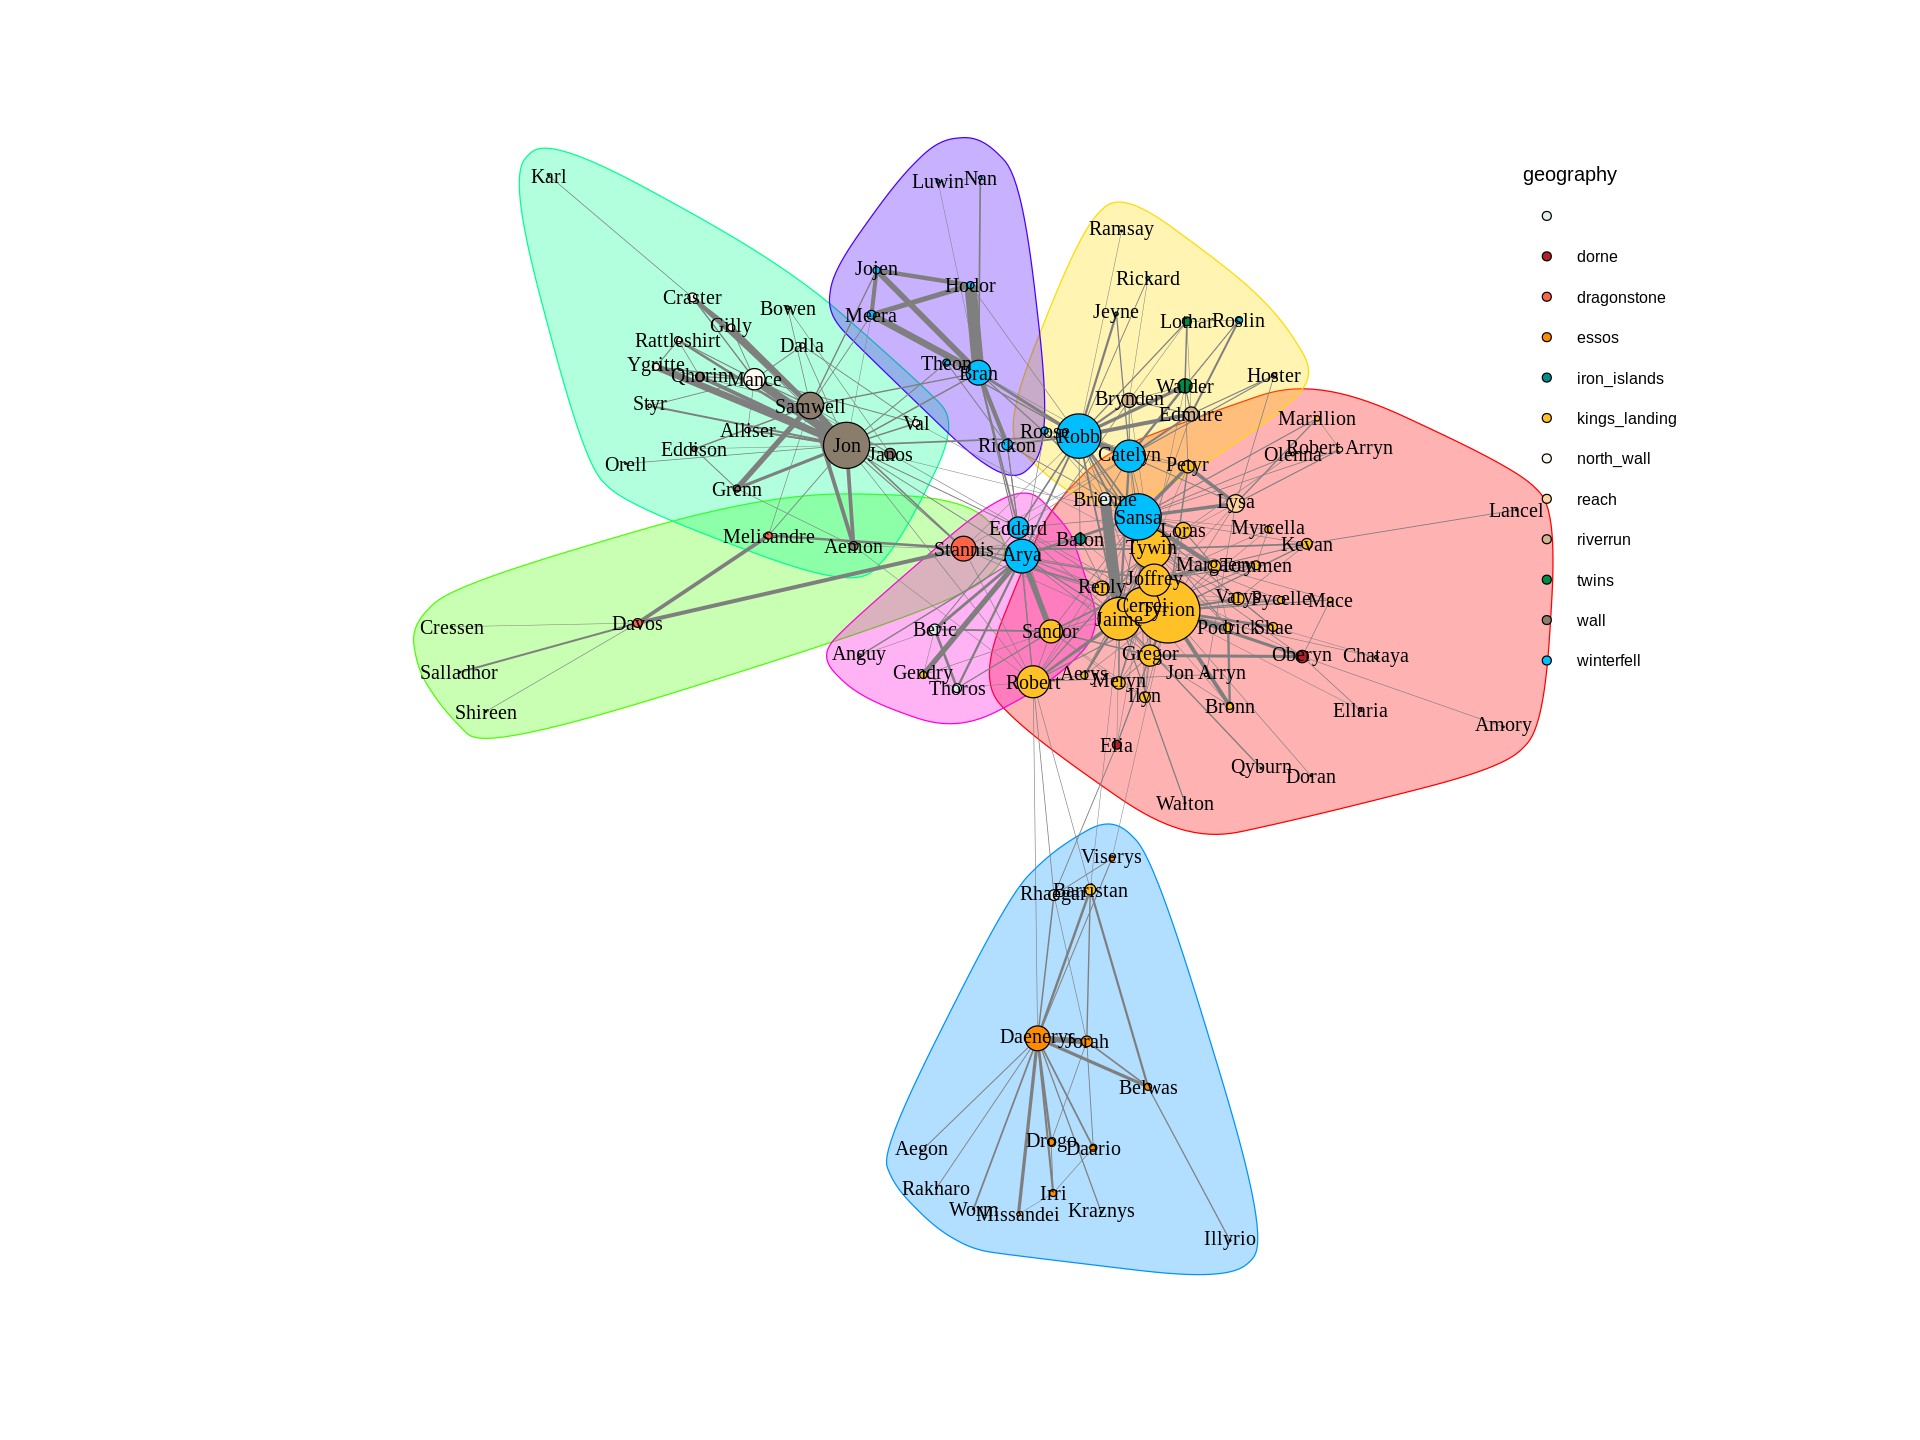

In [18]:
fg <- cluster_fast_greedy(net, weights = E(net)$Weight)

modularity(fg)
membership(fg)

V(net)$community <- membership(fg)
cols <- rainbow(7)
V(net)$color <- cols[V(net)$community]

E(net)$color <- 'gray50'

#unique(V(net)$geography) %>% length
#colrs <- c("gray50", rainbow(11))

#colors correspond roughtly to show geography
colrs <- c("azure2", 'firebrick', 'tomato', 'darkorange', 
           'darkcyan','goldenrod1', 'floralwhite', 'burlywood1', 'tan', 'springgreen4','bisque4','deepskyblue')

new_cols <- colrs[as.factor(V(net)$geography)]
set.seed(2020)

plot(fg, net, new_cols, edge.color=E(net)$color, vertex.label.color='black')
legend(x=1, y=1, as.factor(V(net)$geography) %>% levels(), pch=21,
       col="black", pt.bg=colrs, pt.cex=1, bty="n", ncol=1, cex=0.8)
text('geography', x = 1.1, y=1, cex = 1, col='black')

[1] 0.5999021

       Aemon        Grenn      Samwell        Aerys        Jaime       Robert 
           4            4            4            1            1            1 
      Tyrion        Tywin      Alliser        Mance        Amory       Oberyn 
           1            1            4            4            1            1 
        Arya        Anguy        Beric         Bran      Brynden       Cersei 
           7            7            7            6            2            1 
      Gendry       Gregor      Joffrey          Jon       Rickon        Roose 
           7            1            1            4            6            2 
      Sandor       Thoros        Balon        Loras       Belwas    Barristan 
           7            7            1            1            5            5 
     Illyrio        Hodor        Jojen        Luwin        Meera          Nan 
           5            6            6            6            6            6 
       Theon      Brienne        Bronn      Podrick 

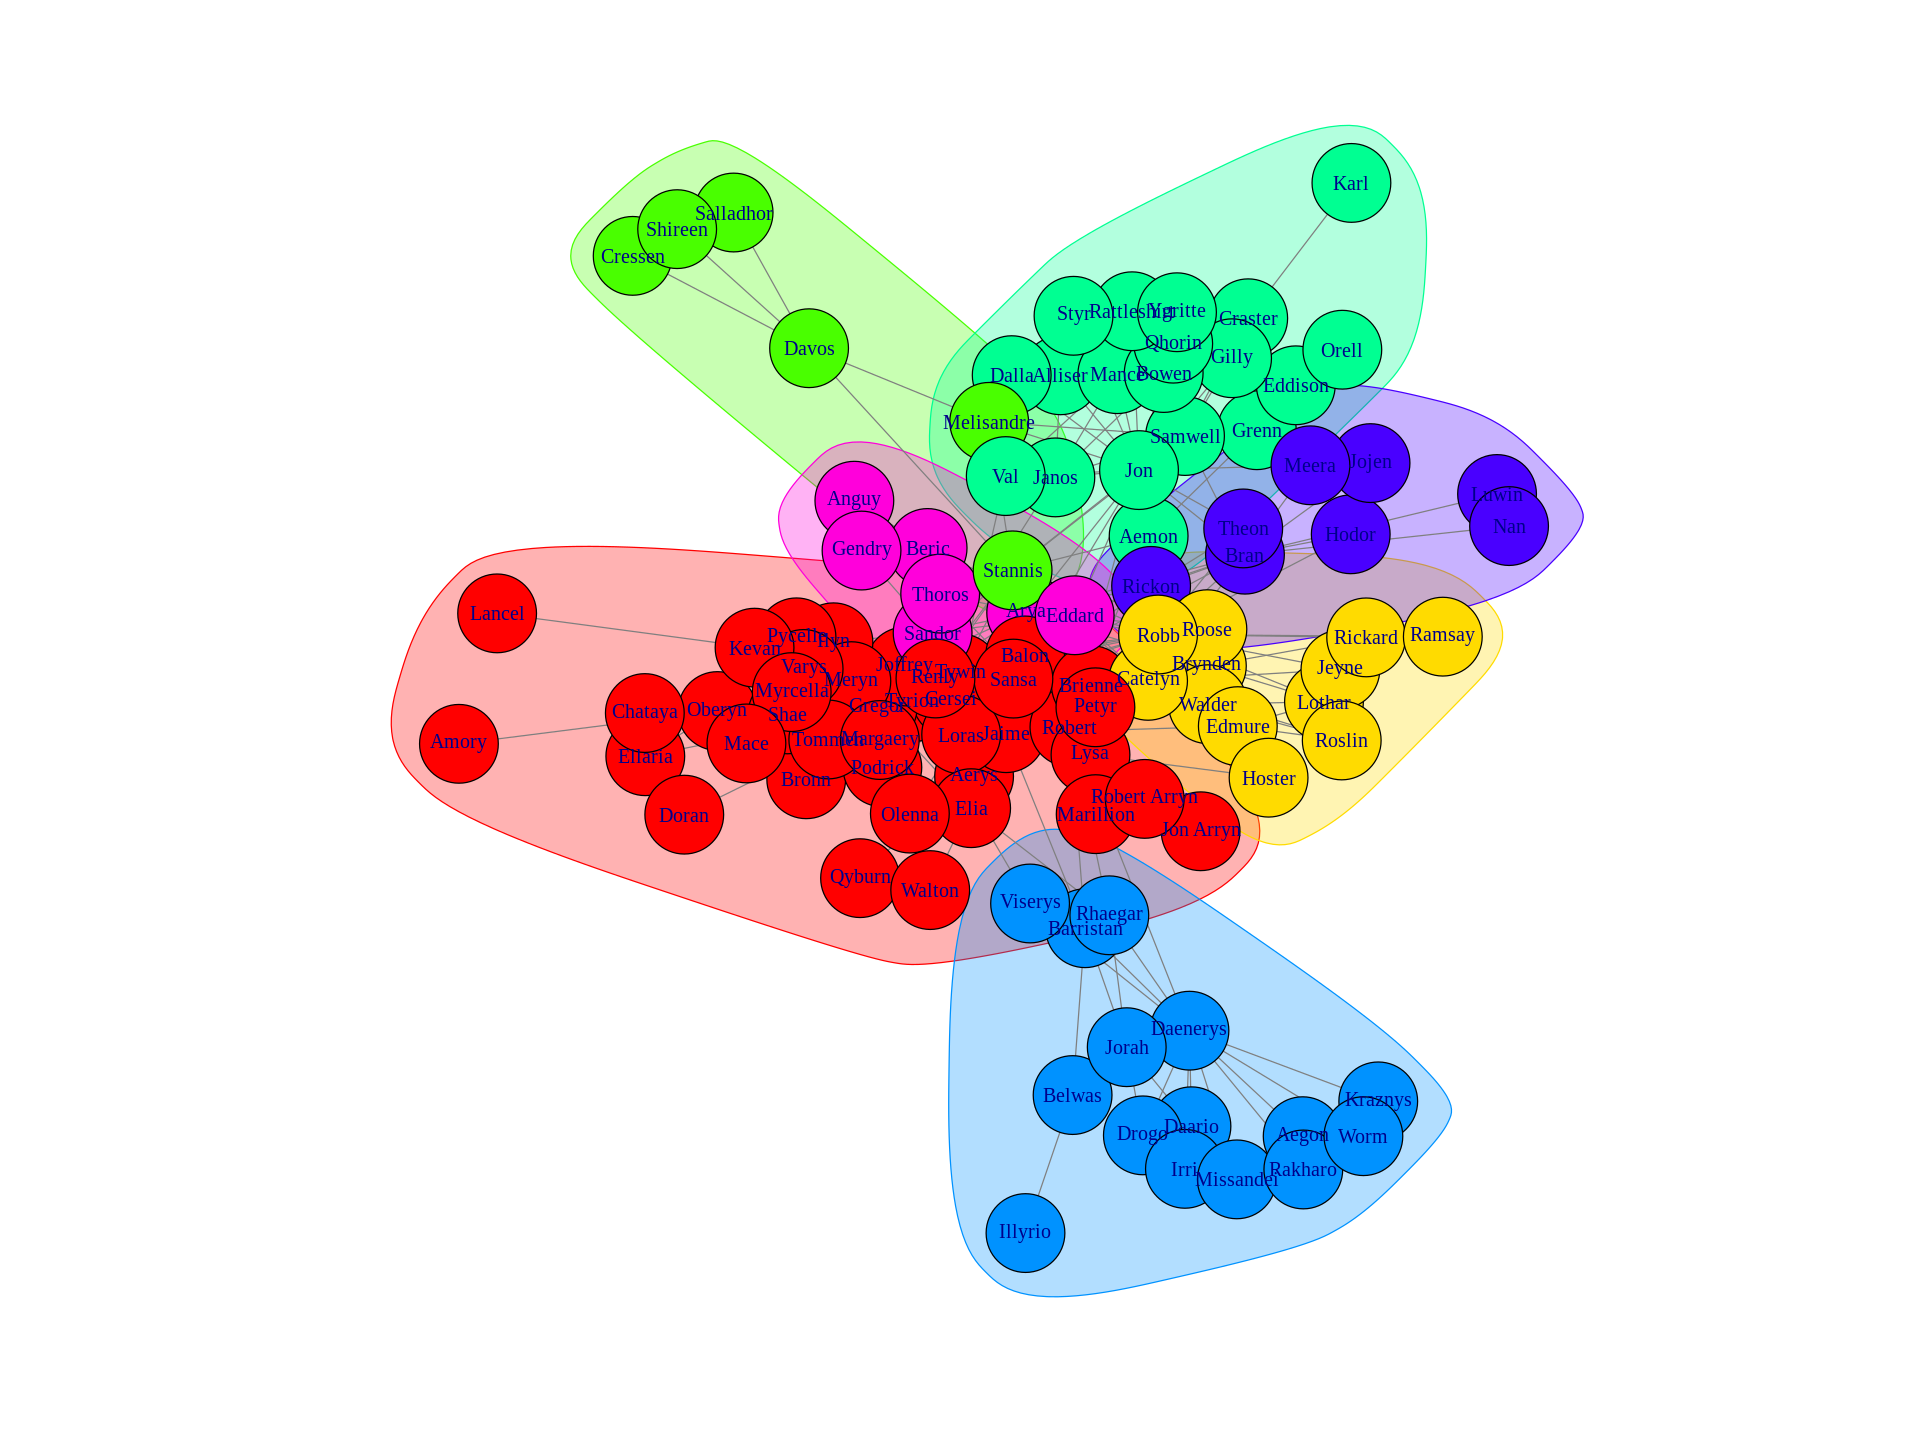

In [19]:
# simple community detection

nodes <- read.csv("got-nodes-original.csv", header=T, as.is=T)
edges <- read.csv("got-edges.csv", header=T, as.is=T)

net <- graph_from_data_frame(d=edges, vertices=nodes, directed=F) 


fg <- cluster_fast_greedy(net, weights = E(net)$Weight)

modularity(fg)
membership(fg)

V(net)$community <- membership(fg)
cols <- rainbow(7)
V(net)$color <- cols[V(net)$community]

E(net)$color <- 'gray50'

#unique(V(net)$geography) %>% length
colrs <- c("gray50", rainbow(17))

new_cols <- cols[membership(fg)]

plot(fg, net, new_cols, edge.color=E(net)$color)